<a href="https://colab.research.google.com/github/Seboldju/JS_JR_NK_Softwareentwicklung-Tankstellen/blob/main/Volz_Abgabe_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auswahl der Tankstelle und Betrachtungszeitraum


In [ ]:
id = "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7" # ID of the fuel station of interest (Aral Tankstelle Lochäckerstraße 294)
ids_pf = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]
days = 30 # Number of days of interest, counting backwards from today,
# above 200 days requires local engine or Colab Pro, runs out of memory in free version

# Installation notwendiger Bibliotheken TBD

In [ ]:
import datetime
import pandas as pd
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Generierung Downloadlink und herunterladen aktueller Daten

In [ ]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
print(yesterday)

2024-06-24


In [ ]:
twodaysago = today - datetime.timedelta(days=2)

In [ ]:
def linkFromDate(date) :
  link_prefix = "https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=/prices/"
  link_datepart = "2024/04/2024-04-23"
  link_datepart = date.strftime('%Y/%m/%Y-%m-%d')
  link_postfix = "-prices.csv"
  link = link_prefix + link_datepart + link_postfix
  return link

In [ ]:
link = linkFromDate(twodaysago)

In [ ]:
def downloadData(url) :
  command = ["wget", "-O","prices.csv",url]
  result = subprocess.run(command, capture_output=True, text=True)
  # Print the output from the command
  # print("Output:")
  # print(result.stdout)
  # Check for errors
  if result.stderr:
    print("Error:")
    print(result.stderr)

In [ ]:
raw_data = None
for i in range(days):
  day = today - datetime.timedelta(days=(days-i))
  # print(day)
  link = linkFromDate(day)
  try:
    downloadData(link)
    df = pd.read_csv("prices.csv")
    # df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S+02', , utc=True)
    df.date = pd.to_datetime(df.date, utc=True)
    if(raw_data is None) :
      raw_data = df
    else :
      raw_data = pd.concat([raw_data, df], ignore_index=True)
  except:
    print("Could not download or process " + link)
raw_data.describe()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  5900K .......... .......... .......... .......... .......... 19.3M
  5950K .......... .......... .......... .......... .......... 16.4M
  6000K .......... .......... .......... .......... .......... 16.0M
  6050K .......... .......... .......... .......... .......... 15.8M
  6100K .......... .......... .......... .......... .......... 20.1M
  6150K .......... .......... .......... .......... .......... 19.0M
  6200K .......... .......... .......... .......... .......... 16.9M
  6250K .......... .......... .......... .......... .......... 15.0M
  6300K .......... .......... .......... .......... .......... 14.1M
  6350K .......... .......... .......... .......... .......... 13.8M
  6400K .......... .......... .......... .......... .......... 17.9M
  6450K .......... .......... .......... .......... .......... 21.2M
  6500K .......... .......... .......... .......... .......... 14.6M
  6550K .......... .......... ......

,diesel,e5,e10,dieselchange,e5change,e10change
count,1.232142e+07,1.232142e+07,1.232142e+07,1.232142e+07,1.232142e+07,1.232142e+07
mean,1.644718e+00,1.800262e+00,1.694215e+00,7.832825e-01,7.747065e-01,7.522553e-01
std,5.576604e-02,2.307977e-01,3.600501e-01,4.122449e-01,4.180353e-01,4.320001e-01
min,-1.000000e-03,0.000000e+00,-1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.609000e+00,1.789000e+00,1.729000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.639000e+00,1.824000e+00,1.759000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.679000e+00,1.859000e+00,1.799000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,4.989000e+00,4.480000e+00,4.449000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [ ]:
raw_data.head(20)

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2024-05-25 22:00:55+00:00,d4969cf8-baba-4364-a2b8-59b544ad00ce,1.629,1.839,1.779,1,1,1
1,2024-05-25 22:00:55+00:00,44eb291f-06e6-4d55-8ad3-9d98ba21011f,1.649,1.839,1.779,0,1,1
2,2024-05-25 22:00:55+00:00,34c0c156-7eb2-4271-88e2-e7474dea15ca,1.639,1.849,1.789,1,1,1
3,2024-05-25 22:00:55+00:00,0848a73e-a8c2-4c14-a955-a81b9e710ab5,1.629,1.779,1.719,1,1,1
4,2024-05-25 22:00:55+00:00,d042965a-c52b-4fa8-a6c0-bbde94ea6c69,1.609,1.829,1.729,1,1,0
5,2024-05-25 22:00:55+00:00,283dc83f-e278-444e-ab90-9bad89eb663a,1.639,1.849,1.789,1,0,0
6,2024-05-25 22:00:55+00:00,d2ba52c2-6f83-45bd-abdc-660a878976df,1.629,1.839,1.789,0,1,1
7,2024-05-25 22:00:55+00:00,7aeee46e-e371-445e-8d07-0184c3369e04,1.659,1.799,1.739,1,1,1
8,2024-05-25 22:00:55+00:00,bcb200c9-b425-45f5-84be-244bd71ac031,1.579,1.809,1.749,1,1,1
9,2024-05-25 22:00:55+00:00,a40f8609-356c-4a23-9a21-97ec53b79ce8,1.659,1.879,1.819,1,0,0


# Download und Erneutes einlesen der CSV zum Einfrieren der Daten.


In [ ]:
## DataFrame als CSV-Datei speichern
#raw_data.to_csv('raw_data.csv', index=False)

# CSV-Datei herunterladen
#from google.colab import files
#files.download('raw_data.csv')

In [ ]:
# Beispiel: Lesen der CSV-Datei von einem Pfad
#raw_data = pd.read_csv('/mnt/data/raw_data.csv')

# Anzeigen der ersten Zeilen des DataFrames
#print(raw_data.head())

# Vorverarbeitung der Daten für die weitere Analyse

**Datapreprocessing:**

* Filtern des Rohdatensatzes nach Pforzheimer Tankstellen
* Konvertieren der Spalte "date" in die richtige Zeitzone
* Abrunden der Sekunden auf volle Minuten
* Identifikation des Betrachtungszeitraums durch Festlegung des höchsten Datums im Datensatz als end_date und des niedrigsten Datums als start_date
* Erstellung eines neuen DataFrames mit einem Zeitstempel für jede Minute im betrachtungszeitraum
* erneute Spezifikationsmöglichkeit für IDs (falls für die CLusteranalyse nur bestimmte IDs betrachtet werden wollen)* Erweiterung des erstellten DataFrames durch eine Zeile mit jeder Minute für jede der Tankstellen in der ID-Liste
* Verbindung des neuen erweiterten DataFrame mit den ursprünglichen Preisänderungsdaten anhand der Merkmale 'station_uuid' und 'date'
* Auffüllen der leeren Zeilen mit dem letzten bekannten Preis durch den ffill. Hierbei wurde darauf geachtet, dass die Preisänderungsspalten (diesel_change, e10_change, e5_change) nicht aufgefüllt werden, sondern leer bleiben, damit man die ursprünglichen und aufgefüllten Daten im Datensatz unterscheiden kann und die Spaltensumme weiterhin der Anzahl der Änderungen entspricht.
* Anschließend wurde der geupdatete Datensatz mit Originaldaten von Tankerkönig.de abgeglichen, wodurch die Korrektheit der Daten bestätigt werden konnte



In [ ]:
import pandas as pd

# Filtern des Datensatzes nach den IDs in ids_pf
data_cluster = raw_data[raw_data['station_uuid'].isin(ids_pf)]
data_cluster['date'] = pd.to_datetime(data_cluster['date'], utc=True).dt.tz_convert('Europe/Berlin')

# Runden der Sekunden auf volle Minuten
data_cluster['date'] = data_cluster['date'].dt.floor('T')

# Definiere den Zeitraum
start_date = data_cluster['date'].min().floor('D')
end_date = data_cluster['date'].max().ceil('D')

# Erstelle einen DataFrame mit einem Zeitstempel für jede Minute im betrachteten Zeitraum
all_minutes = pd.date_range(start=start_date, end=end_date, freq='T', tz='Europe/Berlin')
all_minutes_df = pd.DataFrame(all_minutes, columns=['date'])

# Liste der spezifischen Tankstellen-IDs
station_ids = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]

# Erstelle einen DataFrame mit einer Zeile für jede Minute und jede dieser spezifischen Tankstellen
expanded_df = pd.concat([all_minutes_df.assign(station_uuid=station_id) for station_id in station_ids], ignore_index=True)

# Merge der erweiterten Daten mit den Preisänderungsdaten
merged_df = pd.merge(expanded_df, data_cluster, on=['date', 'station_uuid'], how='left')

# Definiere die Spalten, die gefüllt werden sollen
price_columns = ['diesel', 'e5', 'e10']

# Gruppiere nach Tankstellen-ID und fülle die fehlenden Werte auf, ohne die Änderungs-Spalten zu beeinflussen
for station_id in station_ids:
    station_data = merged_df[merged_df['station_uuid'] == station_id].copy()
    station_data[price_columns] = station_data[price_columns].fillna(method='ffill').fillna(0)

    # Update nur die Preis-Spalten im ursprünglichen DataFrame
    merged_df.loc[merged_df['station_uuid'] == station_id, price_columns] = station_data[price_columns]

# Zeige die ersten paar Zeilen des aufgefüllten DataFrames
print(merged_df.head())


<ipython-input-21-de3b8acc4367>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['date'] = pd.to_datetime(data_cluster['date'], utc=True).dt.tz_convert('Europe/Berlin')
<ipython-input-21-de3b8acc4367>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['date'] = data_cluster['date'].dt.floor('T')


                       date                          station_uuid  diesel  \
0 2024-05-26 00:00:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
1 2024-05-26 00:01:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
2 2024-05-26 00:02:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
3 2024-05-26 00:03:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
4 2024-05-26 00:04:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   

    e5  e10  dieselchange  e5change  e10change  
0  0.0  0.0           NaN       NaN        NaN  
1  0.0  0.0           NaN       NaN        NaN  
2  0.0  0.0           NaN       NaN        NaN  
3  0.0  0.0           NaN       NaN        NaN  
4  0.0  0.0           NaN       NaN        NaN  


**Extraktion von Stunde, Wochentag und Minute als neue Spalten**

Stunde, Wochentag und Minute werden aus der konvertierte 'date'-Spalte extrahiert, was spätere Gruppierungen erleichtern soll.

In [ ]:
# Extrahierung der Stunde, Wochentag und Minute aus der konvertierten 'date'-Spalte
merged_df['hour'] = merged_df['date'].dt.hour
merged_df['weekday'] = merged_df['date'].dt.weekday
merged_df['minute'] = merged_df['date'].dt.minute

print(merged_df.head())

                       date                          station_uuid  diesel  \
0 2024-05-26 00:00:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
1 2024-05-26 00:01:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
2 2024-05-26 00:02:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
3 2024-05-26 00:03:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
4 2024-05-26 00:04:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   

    e5  e10  dieselchange  e5change  e10change  hour  weekday  minute  
0  0.0  0.0           NaN       NaN        NaN     0        6       0  
1  0.0  0.0           NaN       NaN        NaN     0        6       1  
2  0.0  0.0           NaN       NaN        NaN     0        6       2  
3  0.0  0.0           NaN       NaN        NaN     0        6       3  
4  0.0  0.0           NaN       NaN        NaN     0        6       4  


**Umbenennung der Tankstellen in der uu_id-Spalte...**

...in den Klarnamen der Tankstelle, zur besseren Lesbarkeit

In [ ]:
# Mapping der Station UUIDs zu den neuen Namen
station_names = {
    "0be32f00-8ff4-45bf-bb4c-1588d6e03aa1": "Tankcenter_Wurmberger",
    "0dc6786a-38e4-4576-8848-335975dea87b": "Aral_Armsel",
    "3fe8dc63-1663-430f-bcc3-5bdbf281d3af": "BFT_Haupt",
    "4153a547-046a-410c-a575-968f21f1ce66": "Aral_Karlsruher",
    "615f2d73-5214-47f2-8691-e4a8134380bb": "Access_Calwer",
    "6657358a-cf8c-4d8a-b4ec-a835271041ac": "ENI_Karlsruher",
    "71ee41a5-8e67-4c50-85ab-37b95f1ec76e": "Shell_Zerrenner",
    "7a8d7a4a-a898-48c1-9420-f4a843d3d32e": "SB_Eutinger",
    "85d87996-9667-4563-be19-7dd758a9a4a0": "Esso_KaiserFriedrich",
    "94fb812e-dae2-4d1e-c4c3-d7837b468dab": "TP_Braetzingen",
    "99f5fdc2-80d8-4c38-aa04-6295d0d78f96": "Esso_Calwer",
    "a839b4f0-ec0d-474a-a839-4ada95a6ca8a": "ENI_Hirsauer",
    "b0e03550-8c80-4917-92e7-db40e975d9f2": "Shell_Buchbusch",
    "d6e30bca-f474-4e02-aef2-56bd5c2545d9": "Aral_KaiserFriedrich",
    "fbc4af15-1e1d-46ba-9a44-80c47900f3a5": "Total_Breslauer",
    "22375adc-ed7e-423b-8191-2cd266f6bcd6": "MastOehlert_Blaecher",
    "35d5f441-d930-4993-adf4-ee1abdf14000": "Shell_Wilferdinger",
    "51d4b626-a095-1aa0-e100-80009459e03a": "JET_Karlsruher",
    "51d4b6b4-a095-1aa0-e100-80009459e03a": "JET_Luisen",
    "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7": "Aral_Lochaecker"
}

# Ersetzen der station_uuid durch die neuen Namen
merged_df['station_uuid'] = merged_df['station_uuid'].map(station_names).fillna(merged_df['station_uuid'])

# Ersetzen von Nullwerten in den Preis-Spalten durch NaN, da die Minimalpreise sonst aufgrund fehlender Werte verfälscht werden würden
merged_df[price_columns] = merged_df[price_columns].replace(0, np.nan)

# Anzeigen der ersten paar Zeilen des DataFrames zur Überprüfung
print(merged_df)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-26 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-26 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-26 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-26 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-26 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-24 23:56:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864016 2024-06-24 23:57:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864017 2024-06-24 23:58:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864018 2024-06-24 23:59:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864019 2024-06-25 00:00:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   

        dieselchange  e5cha

**Validierung der Daten**

Der neu erstellte Datensatz wurde als CSV-Datei exportiert und mit Daten von Tankerkönig.de abgeglichen.

# Ergänzung weiterer Spalten zum DataFrame, für die anschließenden Berechnungen

Zunächst hinzufügen von neuen Spalten, welche die absolute Preisänderungen der Kraftstoffe für jede Zeile ausgeben

In [ ]:
# Berechnung der Preisänderungen
merged_df['diesel_change_value'] = merged_df.groupby('station_uuid')['diesel'].diff()
merged_df['e5_change_value'] = merged_df.groupby('station_uuid')['e5'].diff()
merged_df['e10_change_value'] = merged_df.groupby('station_uuid')['e10'].diff()

# Zeige die ersten paar Zeilen des aktualisierten DataFrames an
print(merged_df)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-26 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-26 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-26 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-26 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-26 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-24 23:56:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864016 2024-06-24 23:57:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864017 2024-06-24 23:58:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864018 2024-06-24 23:59:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864019 2024-06-25 00:00:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   

        dieselchange  e5cha

Hinzufügen der Zeit seit der letzten Preisänderung für jede Kraftstoffart

In [ ]:
# Sicherstellen, dass das Datum als Datetime-Objekt vorliegt
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Berechnung der Zeitdifferenz zu den Zeitstempeln, an denen eine Preisänderung stattgefunden hat
def calculate_time_diff(df, price_change_col):
    # Zeitdifferenz nur zu den Zeilen mit Preisänderungen berechnen
    df['change_time'] = df['date'].where(df[price_change_col] == 1)
    df['change_time'] = df['change_time'].fillna(method='ffill')
    time_diff = (df['date'] - df['change_time']).dt.total_seconds() / 60  # in Minuten
    return time_diff

# Berechnung der Zeitdifferenzen für Diesel, E5 und E10
merged_df['time_since_last_change_diesel'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'dieselchange')).reset_index(level=0, drop=True)
merged_df['time_since_last_change_e5'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'e5change')).reset_index(level=0, drop=True)
merged_df['time_since_last_change_e10'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'e10change')).reset_index(level=0, drop=True)

# Entfernen der temporären Spalte 'change_time'
merged_df.drop(columns=['change_time'], inplace=True, errors='ignore')

# Zeige die ersten paar Zeilen des aktualisierten DataFrames an
print(merged_df.head())


                       date           station_uuid  diesel  e5  e10  \
0 2024-05-26 00:00:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
1 2024-05-26 00:01:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
2 2024-05-26 00:02:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
3 2024-05-26 00:03:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
4 2024-05-26 00:04:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   

   dieselchange  e5change  e10change  hour  weekday  minute  \
0           NaN       NaN        NaN     0        6       0   
1           NaN       NaN        NaN     0        6       1   
2           NaN       NaN        NaN     0        6       2   
3           NaN       NaN        NaN     0        6       3   
4           NaN       NaN        NaN     0        6       4   

   diesel_change_value  e5_change_value  e10_change_value  \
0                  NaN              NaN               NaN   
1                  NaN              NaN               NaN   
2          

Hinzufügen von Spalten, die Angeben, ob der Kraftstoffpreis gestiegen oder gesunken ist, um daraus das Verhältnis von Preissenkungen zu Preiserhöhungen zu berechnen

In [ ]:
# Anzeigen ob der Kraftstoffpreis steigt oder fällt, für die Berechnung des Verhältnisses von Preissenkungen zu Preiserhöhungen
merged_df['diesel_increase'] = (merged_df['diesel_change_value'] > 0).astype(int)
merged_df['diesel_decrease'] = (merged_df['diesel_change_value'] < 0).astype(int)

merged_df['e5_increase'] = (merged_df['e5_change_value'] > 0).astype(int)
merged_df['e5_decrease'] = (merged_df['e5_change_value'] < 0).astype(int)

merged_df['e10_increase'] = (merged_df['e10_change_value'] > 0).astype(int)
merged_df['e10_decrease'] = (merged_df['e10_change_value'] < 0).astype(int)

# Zeige die ersten paar Zeilen des aktualisierten DataFrames an
print(merged_df.head())


                       date           station_uuid  diesel  e5  e10  \
0 2024-05-26 00:00:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
1 2024-05-26 00:01:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
2 2024-05-26 00:02:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
3 2024-05-26 00:03:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
4 2024-05-26 00:04:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   

   dieselchange  e5change  e10change  hour  weekday  ...  e10_change_value  \
0           NaN       NaN        NaN     0        6  ...               NaN   
1           NaN       NaN        NaN     0        6  ...               NaN   
2           NaN       NaN        NaN     0        6  ...               NaN   
3           NaN       NaN        NaN     0        6  ...               NaN   
4           NaN       NaN        NaN     0        6  ...               NaN   

   time_since_last_change_diesel  time_since_last_change_e5  \
0                            NaN         

# Berechnungen der Metriken für die Clusteranalyse

**Berechnung der Häufigkeit der Preisänderungen pro Tag**

Diese Metrik gibt uns Auskunft darüber, wie oft eine Tankstelle im Durchschnitt ihre Preise pro Tag ändert

In [ ]:
# Berechnung der Häufigkeit der Preisänderungen pro Tag für Diesel, E5 und E10
merged_df['date_only'] = merged_df['date'].dt.date

price_change_frequency_diesel = merged_df[merged_df['dieselchange'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()
price_change_frequency_e5 = merged_df[merged_df['e5change'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()
price_change_frequency_e10 = merged_df[merged_df['e10change'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()

price_change_frequency_df = pd.DataFrame({
    'price_change_frequency_diesel': price_change_frequency_diesel,
    'price_change_frequency_e5': price_change_frequency_e5,
    'price_change_frequency_e10': price_change_frequency_e10
})
price_change_frequency_df = price_change_frequency_df.add_suffix('_avg_number_of_changes_per_day')
print(price_change_frequency_df.head())

                      price_change_frequency_diesel_avg_number_of_changes_per_day  \
station_uuid                                                                        
Access_Calwer                                                 20.633333             
Aral_Armsel                                                   22.100000             
Aral_KaiserFriedrich                                          18.366667             
Aral_Karlsruher                                               25.966667             
Aral_Lochaecker                                               23.900000             

                      price_change_frequency_e5_avg_number_of_changes_per_day  \
station_uuid                                                                    
Access_Calwer                                                 20.466667         
Aral_Armsel                                                   23.900000         
Aral_KaiserFriedrich                                          20.466667         

**Berechnung der durchschnittlichen Dauer zwischen Preisänderungen**

Diese Metrik zeigt uns, wie viele Minuten es im Durchschnitt dauert, bis eine Tankstelle ihre Preise ändert

In [ ]:
# Durchschnittliche Dauer zwischen Preisänderungen berechnen
average_time_between_changes_diesel = merged_df.groupby('station_uuid')['time_since_last_change_diesel'].mean()
average_time_between_changes_e5 = merged_df.groupby('station_uuid')['time_since_last_change_e5'].mean()
average_time_between_changes_e10 = merged_df.groupby('station_uuid')['time_since_last_change_e10'].mean()

average_time_between_changes_df = pd.DataFrame({
    'average_time_between_changes_diesel': average_time_between_changes_diesel,
    'average_time_between_changes_e5': average_time_between_changes_e5,
    'average_time_between_changes_e10': average_time_between_changes_e10
})

average_time_between_changes_df = average_time_between_changes_df.add_suffix('_in_minutes')

print(average_time_between_changes_df.head())


                      average_time_between_changes_diesel_in_minutes  \
station_uuid                                                           
Access_Calwer                                             136.456891   
Aral_Armsel                                                92.930130   
Aral_KaiserFriedrich                                       91.262430   
Aral_Karlsruher                                            75.594583   
Aral_Lochaecker                                            90.545118   

                      average_time_between_changes_e5_in_minutes  \
station_uuid                                                       
Access_Calwer                                         136.018236   
Aral_Armsel                                            90.362199   
Aral_KaiserFriedrich                                   88.987715   
Aral_Karlsruher                                        74.733910   
Aral_Lochaecker                                        91.193967   

                  

**Berechnung des prozentualen Anteils der Preiserhöhungen und -senkungen**

Diese Metrik gibt uns Einblicke, wie hoch der Anteil der Preissenkungen/Preissteigerungen an der Gesamtzahl der Preisänderungen für eine Tankstelle ist.

In [ ]:
# Berechnung des Anteils der Preiserhöhungen und -senkungen
total_price_changes_diesel = merged_df.groupby('station_uuid')['dieselchange'].sum()
total_price_changes_e5 = merged_df.groupby('station_uuid')['e5change'].sum()
total_price_changes_e10 = merged_df.groupby('station_uuid')['e10change'].sum()

price_increase_percentage_diesel = merged_df.groupby('station_uuid')['diesel_increase'].sum() / total_price_changes_diesel
price_decrease_percentage_diesel = merged_df.groupby('station_uuid')['diesel_decrease'].sum() / total_price_changes_diesel

price_increase_percentage_e5 = merged_df.groupby('station_uuid')['e5_increase'].sum() / total_price_changes_e5
price_decrease_percentage_e5 = merged_df.groupby('station_uuid')['e5_decrease'].sum() / total_price_changes_e5

price_increase_percentage_e10 = merged_df.groupby('station_uuid')['e10_increase'].sum() / total_price_changes_e10
price_decrease_percentage_e10 = merged_df.groupby('station_uuid')['e10_decrease'].sum() / total_price_changes_e10

price_change_percentage_df = pd.DataFrame({
    'price_increase_percentage_diesel': price_increase_percentage_diesel,
    'price_decrease_percentage_diesel': price_decrease_percentage_diesel,
    'price_increase_percentage_e5': price_increase_percentage_e5,
    'price_decrease_percentage_e5': price_decrease_percentage_e5,
    'price_increase_percentage_e10': price_increase_percentage_e10,
    'price_decrease_percentage_e10': price_decrease_percentage_e10
})

print(price_change_percentage_df.head())


                      price_increase_percentage_diesel  \
station_uuid                                             
Access_Calwer                                 0.368336   
Aral_Armsel                                   0.360483   
Aral_KaiserFriedrich                          0.433757   
Aral_Karlsruher                               0.306804   
Aral_Lochaecker                               0.330544   

                      price_decrease_percentage_diesel  \
station_uuid                                             
Access_Calwer                                 0.630048   
Aral_Armsel                                   0.638009   
Aral_KaiserFriedrich                          0.564428   
Aral_Karlsruher                               0.691913   
Aral_Lochaecker                               0.668061   

                      price_increase_percentage_e5  \
station_uuid                                         
Access_Calwer                             0.374593   
Aral_Armsel             

**Berechnung der durchschnittlichen Preisänderungshöhe pro Änderungstyp (Erhöhung vs. Senkung)**

Diese Metrik zeigt uns die durchschnittliche Höhe der Preisänderungen in Euro bei Erhöhungen und Senkungen

In [ ]:
# Berechnung der durchschnittlichen Preisänderungshöhe pro Änderungstyp
average_increase_amount_diesel = merged_df[merged_df['diesel_increase'] == 1].groupby('station_uuid')['diesel_change_value'].mean()
average_decrease_amount_diesel = merged_df[merged_df['diesel_decrease'] == 1].groupby('station_uuid')['diesel_change_value'].mean()

average_increase_amount_e5 = merged_df[merged_df['e5_increase'] == 1].groupby('station_uuid')['e5_change_value'].mean()
average_decrease_amount_e5 = merged_df[merged_df['e5_decrease'] == 1].groupby('station_uuid')['e5_change_value'].mean()

average_increase_amount_e10 = merged_df[merged_df['e10_increase'] == 1].groupby('station_uuid')['e10_change_value'].mean()
average_decrease_amount_e10 = merged_df[merged_df['e10_decrease'] == 1].groupby('station_uuid')['e10_change_value'].mean()

average_change_amount_df = pd.DataFrame({
    'average_increase_amount_diesel': average_increase_amount_diesel,
    'average_decrease_amount_diesel': average_decrease_amount_diesel,
    'average_increase_amount_e5': average_increase_amount_e5,
    'average_decrease_amount_e5': average_decrease_amount_e5,
    'average_increase_amount_e10': average_increase_amount_e10,
    'average_decrease_amount_e10': average_decrease_amount_e10
})

average_change_amount_df = average_change_amount_df.add_suffix('_in_Euro')

print(average_change_amount_df.head())


                      average_increase_amount_diesel_in_Euro  \
station_uuid                                                   
Access_Calwer                                       0.044079   
Aral_Armsel                                         0.056736   
Aral_KaiserFriedrich                                0.057197   
Aral_Karlsruher                                     0.056778   
Aral_Lochaecker                                     0.059536   

                      average_decrease_amount_diesel_in_Euro  \
station_uuid                                                   
Access_Calwer                                      -0.025846   
Aral_Armsel                                        -0.032175   
Aral_KaiserFriedrich                               -0.043955   
Aral_Karlsruher                                    -0.025250   
Aral_Lochaecker                                    -0.029478   

                      average_increase_amount_e5_in_Euro  \
station_uuid                              

**Erstellen von weiteren Berechnungen**

Für die Clusteranalyse wurden folgende weitere Berechnungen für jede Tankstelle und Kraftstoffart durchgeführt, um zusammen mit den bisherigen Berechnungen erste Rückschlüsse auf die Preisstrategie  ziehen zu können (Allgemeines Preisniveau, Preisniveau nach Tageszeiten, Preisschwankungen, Extremwerte etc.):

* Durchschnittspreise nach Stunde
* Durchschnittspreise nach Wochentag
* Minimalpreis nach Stunde
* Minimalpreis nach Wochentag
* Maximalpreis nach Stunde
* Maximalpreis nach Wochentag
* Standardabweichung
* Anzahl der Preisänderungen



In [ ]:
# Entfernen der nicht-numerischen Spalten vor der Gruppierung
price_columns = ['diesel', 'e5', 'e10']
change_columns = ['dieselchange', 'e10change', 'e5change']

# Ersetzen von Nullwerten in den Preis-Spalten durch NaN, da die Minimalpreise sonst aufgrund fehlender Werte verfälscht werden würden
merged_df[price_columns] = merged_df[price_columns].replace(0, np.nan)

# Durchschnittspreise nach Stunde und Wochentag
avg_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].mean().unstack().add_suffix('_avg_price_by_hour_in_Euro')
avg_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].mean().unstack().add_suffix('_avg_price_by_weekday_in_Euro')

min_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].min().unstack().add_suffix('_min_price_by_hour_in_Euro')
max_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].max().unstack().add_suffix('_max_price_by_hour_in_Euro')
min_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].min().unstack().add_suffix('_min_price_by_weekday_in_Euro')
max_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].max().unstack().add_suffix('_max_price_by_weekday_in_Euro')

std_price = merged_df.groupby('station_uuid')[price_columns].std().add_suffix('_std_in_Euro')
price_changes = merged_df.groupby('station_uuid')[change_columns].sum().add_suffix('_total_num_changes')


**Hinzufügen von Metriken, welche das Preisverhalten in Stoßzeiten (Berufsverkehr) untersuchen**


Diese Analyse von Stoßzeiten soll zusätzliche Einblicke in die Preisstrategien der Tankstellen bieten, insbesondere zu Zeiten, in denen die Nachfrage möglicherweise höher ist.

Wir unterteilen den Tag in mehrere Abschnitte und berechnen Metriken speziell für diese Abschnitte. Typische Stoßzeiten könnten zum Beispiel die folgenden sein:

Morgens (Berufsverkehr): 6:00 - 9:00 Uhr
Mittags: 11:00 - 14:00 Uhr
Abends (Berufsverkehr): 16:00 - 19:00 Uhr

Metriken während Stoßzeiten:
* Durchschnittliche Preise während der Stoßzeiten
* Anzahl der Preisänderungen während der Stoßzeiten



In [ ]:
import pandas as pd
import numpy as np

# Definieren der Stoßzeiten
rush_hours = {
    'morning': (6, 9),
    'midday': (11, 14),
    'evening': (16, 19)
}

# Funktion zur Berechnung der Metriken während Stoßzeiten
def calculate_rush_hour_metrics(df, rush_hours, price_columns, change_columns):
    rush_hour_metrics = {}

    for period, (start_hour, end_hour) in rush_hours.items():
        period_df = df[(df['hour'] >= start_hour) & (df['hour'] < end_hour)]

        avg_prices = period_df.groupby('station_uuid')[price_columns].mean().add_suffix(f'_{period}_avg_price_in_Euro')
        num_changes = period_df.groupby('station_uuid')[change_columns].sum().add_suffix(f'_{period}_num_changes')

        rush_hour_metrics[period] = avg_prices.join(num_changes)

    return pd.concat(rush_hour_metrics.values(), axis=1)

# Berechnung der Metriken während Stoßzeiten
rush_hour_metrics_df = calculate_rush_hour_metrics(merged_df, rush_hours, price_columns, change_columns)

print(rush_hour_metrics_df.head())


                      diesel_morning_avg_price_in_Euro  \
station_uuid                                             
Access_Calwer                                 1.644080   
Aral_Armsel                                   1.660358   
Aral_KaiserFriedrich                          1.676743   
Aral_Karlsruher                               1.682419   
Aral_Lochaecker                               1.681944   

                      e5_morning_avg_price_in_Euro  \
station_uuid                                         
Access_Calwer                             1.815247   
Aral_Armsel                               1.840968   
Aral_KaiserFriedrich                      1.846126   
Aral_Karlsruher                           1.848889   
Aral_Lochaecker                           1.851969   

                      e10_morning_avg_price_in_Euro  \
station_uuid                                          
Access_Calwer                              1.755247   
Aral_Armsel                                1.7809

**Zusammenführen aller Metriken in einem DataFrame**

In [ ]:
# Zusammenführen aller berechneten Metriken in einem DataFrame
features_df = avg_price_by_hour.join([
    avg_price_by_weekday, min_price_by_hour, max_price_by_hour,
    min_price_by_weekday, max_price_by_weekday, std_price, price_changes,
    price_change_frequency_df, average_time_between_changes_df,
    price_change_percentage_df, average_change_amount_df,
    rush_hour_metrics_df
])

print(features_df.head())

                      (diesel_avg_price_by_hour_in_Euro, 0_avg_price_by_hour_in_Euro)  \
station_uuid                                                                            
Access_Calwer                                                  1.606611                 
Aral_Armsel                                                    1.609362                 
Aral_KaiserFriedrich                                           1.660051                 
Aral_Karlsruher                                                1.624876                 
Aral_Lochaecker                                                1.656599                 

                      (diesel_avg_price_by_hour_in_Euro, 1_avg_price_by_hour_in_Euro)  \
station_uuid                                                                            
Access_Calwer                                                  1.606586                 
Aral_Armsel                                                    1.609345                 
Aral_KaiserFriedrich

# Vorbereitung der Clusteranalyse (Normalisierung & Bestimmung der Clusterzahl)

**Normalisierung der Daten**

Aufgrund eines Fehler, der besagte dass die Spaltennamen Strings sein müssen, wurden diese konvertiert.

Anschließend wurden die Daten normalisiert, um sie für die Clusternalyse nutzen zu können.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Konvertieren der Spaltennamen in Strings
features_df.columns = features_df.columns.map(str)

# Normalisierung der Daten
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Erstellen eines DataFrames aus den skalierten Daten
features_scaled_df = pd.DataFrame(features_scaled, index=features_df.index, columns=features_df.columns)

# Zeige die ersten paar Zeilen des skalierten DataFrames
print(features_scaled_df.head())



                      ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
station_uuid                                                                                
Access_Calwer                                                 -0.040549                     
Aral_Armsel                                                    0.027926                     
Aral_KaiserFriedrich                                           1.289486                     
Aral_Karlsruher                                                0.414042                     
Aral_Lochaecker                                                1.203571                     

                      ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
station_uuid                                                                                
Access_Calwer                                                 -0.034195                     
Aral_Armsel                                                    0.0340

**Bestimmung der optimalen Anzahl der Cluster mittels Elbow-Methode**

Der Elbow-Plot zeigt, dass sich die Kurve bei etwa 3 oder 4 Clustern zu stabilisieren beginnt. Das bedeutet, dass die optimale Anzahl der Cluster wahrscheinlich 3 oder 4 ist. Es ist klar, dass der größte Unterschied in der WCSS zwischen 1 und 3 Clustern liegt, danach nimmt der Nutzen ab.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

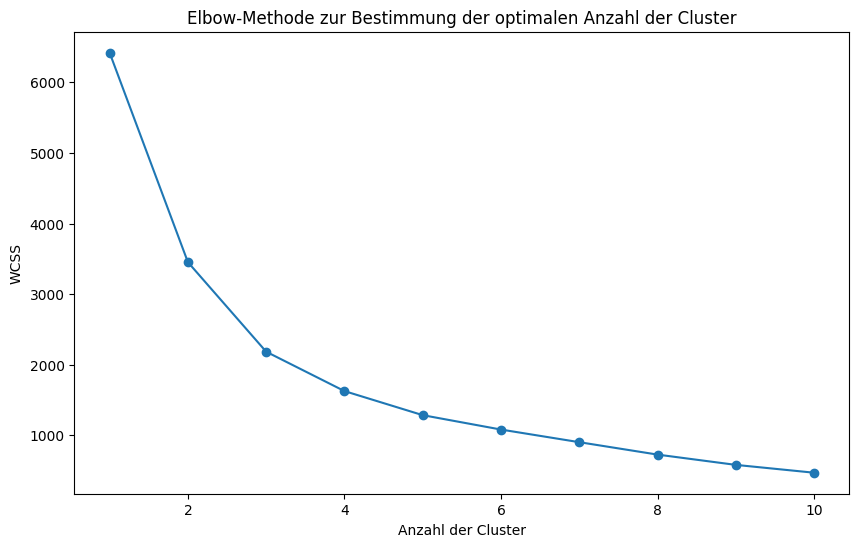

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Bestimmung der optimalen Anzahl der Cluster mit der Elbow-Methode
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot der Elbow-Methode
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Anzahl der Cluster')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS')
plt.show()


**Bestimmung der optimalen Clusterzahl mit Hilfe eines Dendrogramms**

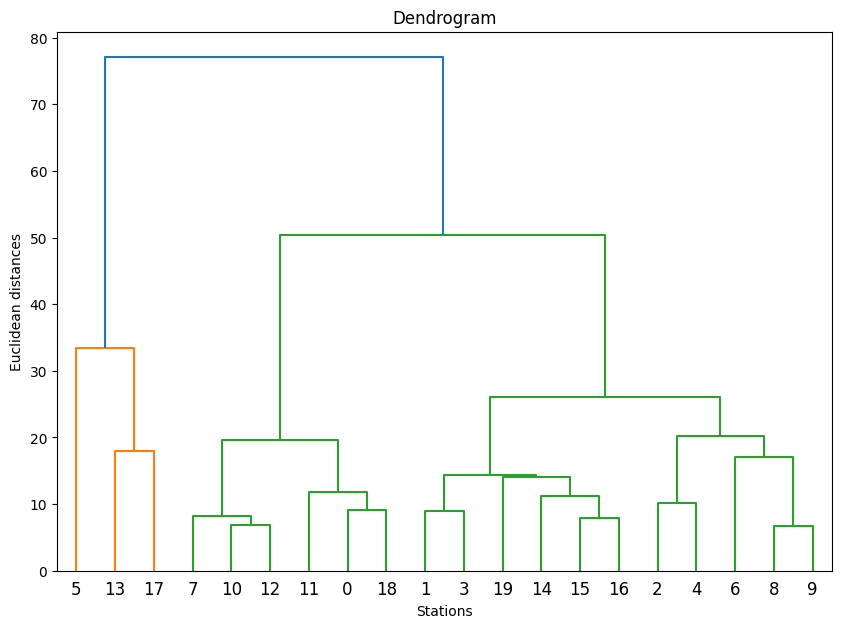

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Erstellung des Dendrogramms
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(features_scaled_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Stations')
plt.ylabel('Euclidean distances')
plt.show()

Auch das Dendrogramm bestätigt, dass 3 die optimale Anzahl an Clustern ist.

# Durchführung der Clusteranalyse und Berechnung der Clusterzentren

**Durchführung der Clusteranalyse mit k-Means**

Die Clusteranalyse wurde mithilfe von kmeans durchgeführt. Als optimale Clusterzahl wurde gemäß der Elbow-Methode 3 gewählt.

In [ ]:
# K-Means Analyse durchführen
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled_df)

# Clusterzugehörigkeit für jede Tankstelle
labels = kmeans.labels_




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Berechnung der Clusterzentren zur Interpretation**

In [ ]:
# Cluster-Zentroiden im normalisierten Raum
cluster_centers_normalized = kmeans.cluster_centers_

# Transformation der Cluster-Zentroiden zurück in die ursprünglichen Einheiten
cluster_centers_original = scaler.inverse_transform(cluster_centers_normalized)

# Erstellung eines DataFrames für die Cluster-Zentroiden in den ursprünglichen Einheiten
centroids_df = pd.DataFrame(cluster_centers_original, columns=features_df.columns)
centroids_df['cluster'] = [f'Cluster {i}' for i in range(3)]

# Ausgabe der Cluster-Zentroiden in den ursprünglichen Einheiten
print(centroids_df)

   ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
0                                           1.593560                     
1                                           1.635408                     
2                                           1.537983                     

   ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
0                                           1.593540                     
1                                           1.635374                     
2                                           1.536341                     

   ('diesel_avg_price_by_hour_in_Euro', '2_avg_price_by_hour_in_Euro')  \
0                                           1.593540                     
1                                           1.635270                     
2                                           1.530425                     

   ('diesel_avg_price_by_hour_in_Euro', '3_avg_price_by_hour_in_Euro')  \
0                                  

In [ ]:
# Transponieren des DataFrames, sodass die Metriken in den Zeilen und die Cluster in den Spalten stehen
centroids_transposed_df = centroids_df.transpose()

from google.colab import files

# Export des DataFrames als CSV mit Index
#centroids_transposed_df.to_csv('Clusterzentren.csv', index=True)
#files.download('Clusterzentren.csv')

print(centroids_transposed_df.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                                          0         1  \
('diesel_avg_price_by_hour_in_Euro', '0_avg_pri...  1.59356  1.635408   
('diesel_avg_price_by_hour_in_Euro', '1_avg_pri...  1.59354  1.635374   
('diesel_avg_price_by_hour_in_Euro', '2_avg_pri...  1.59354   1.63527   
('diesel_avg_price_by_hour_in_Euro', '3_avg_pri...  1.59354   1.63527   
('diesel_avg_price_by_hour_in_Euro', '4_avg_pri...  1.59354  1.635262   

                                                           2  
('diesel_avg_price_by_hour_in_Euro', '0_avg_pri...  1.537983  
('diesel_avg_price_by_hour_in_Euro', '1_avg_pri...  1.536341  
('diesel_avg_price_by_hour_in_Euro', '2_avg_pri...  1.530425  
('diesel_avg_price_by_hour_in_Euro', '3_avg_pri...  1.530425  
('diesel_avg_price_by_hour_in_Euro', '4_avg_pri...  1.530425  


In [ ]:
print(centroids_df)

   ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
0                                           1.593560                     
1                                           1.635408                     
2                                           1.537983                     

   ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
0                                           1.593540                     
1                                           1.635374                     
2                                           1.536341                     

   ('diesel_avg_price_by_hour_in_Euro', '2_avg_price_by_hour_in_Euro')  \
0                                           1.593540                     
1                                           1.635270                     
2                                           1.530425                     

   ('diesel_avg_price_by_hour_in_Euro', '3_avg_price_by_hour_in_Euro')  \
0                                  

**Hierarchische Clusteranalyse**

Eingabe der optimalen Clusterzahl und Durchführung der hierarchischen Clusteranalyse.

In [ ]:
# Anzahl der Cluster (basierend auf Dendrogramm)
optimal_clusters = 3

# Durchführung der Agglomerativen Clusteranalyse
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
features_df['cluster_hc'] = hc.fit_predict(features_scaled_df)

# Ausgabe der Clusterzentren (Durchschnittswerte der Merkmale innerhalb der Cluster)
cluster_centers_hc = features_df.drop(columns='cluster_hc').groupby(features_df['cluster_hc']).mean()

print("Clusterzentren:")
print(cluster_centers_hc)

# Ausgabe der Clusterzugehörigkeit für jede Tankstelle
cluster_membership = features_df[['cluster_hc']]
print("Clusterzugehörigkeit:")
print(cluster_membership)

Clusterzentren:
            ('diesel_avg_price_by_hour_in_Euro', '0_avg_price_by_hour_in_Euro')  \
cluster_hc                                                                        
0                                                    1.537983                     
1                                                    1.635408                     
2                                                    1.593560                     

            ('diesel_avg_price_by_hour_in_Euro', '1_avg_price_by_hour_in_Euro')  \
cluster_hc                                                                        
0                                                    1.536341                     
1                                                    1.635374                     
2                                                    1.593540                     

            ('diesel_avg_price_by_hour_in_Euro', '2_avg_price_by_hour_in_Euro')  \
cluster_hc                                                           

Beschreibung und Interpretation:


# Vorbereitung der Visualisierung der Clusteranalyse

Erstellen eines neuen Dataframe mit den Clusterzentren der Tankstellen

In [ ]:
# Erstellen eines DataFrames mit den Cluster-Zuweisungen
cluster_assignments = pd.DataFrame({
    'station_uuid': features_df.index,
    'cluster': labels
})

# Überprüfung der Cluster-Zuweisungen
print(cluster_assignments)


             station_uuid  cluster
0           Access_Calwer        0
1             Aral_Armsel        1
2    Aral_KaiserFriedrich        1
3         Aral_Karlsruher        1
4         Aral_Lochaecker        1
5               BFT_Haupt        2
6            ENI_Hirsauer        1
7          ENI_Karlsruher        0
8             Esso_Calwer        1
9    Esso_KaiserFriedrich        1
10         JET_Karlsruher        0
11             JET_Luisen        0
12   MastOehlert_Blaecher        0
13            SB_Eutinger        2
14        Shell_Buchbusch        1
15     Shell_Wilferdinger        1
16        Shell_Zerrenner        1
17         TP_Braetzingen        2
18  Tankcenter_Wurmberger        0
19        Total_Breslauer        1


Erstellen eines neuen Dataframes "merges_with_cluster" aus dem ursprünglichen DataFrame und den Clusterzuweisungen

In [ ]:
# Zusammenführen der Cluster-Zuweisungen mit den Originaldaten
merged_with_clusters = pd.merge(merged_df, cluster_assignments, on='station_uuid', how='left')

# Überprüfung der zusammengeführten Daten
print(merged_with_clusters)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-26 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-26 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-26 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-26 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-26 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-24 23:56:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864016 2024-06-24 23:57:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864017 2024-06-24 23:58:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864018 2024-06-24 23:59:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   
864019 2024-06-25 00:00:00+02:00        Aral_Lochaecker   1.679  1.859  1.799   

        dieselchange  e5cha

# Visualisierungen und Beschreibungen der Clusteranalyse

**Durchschnittlicher Preis nach Stunde für jedes Cluster**



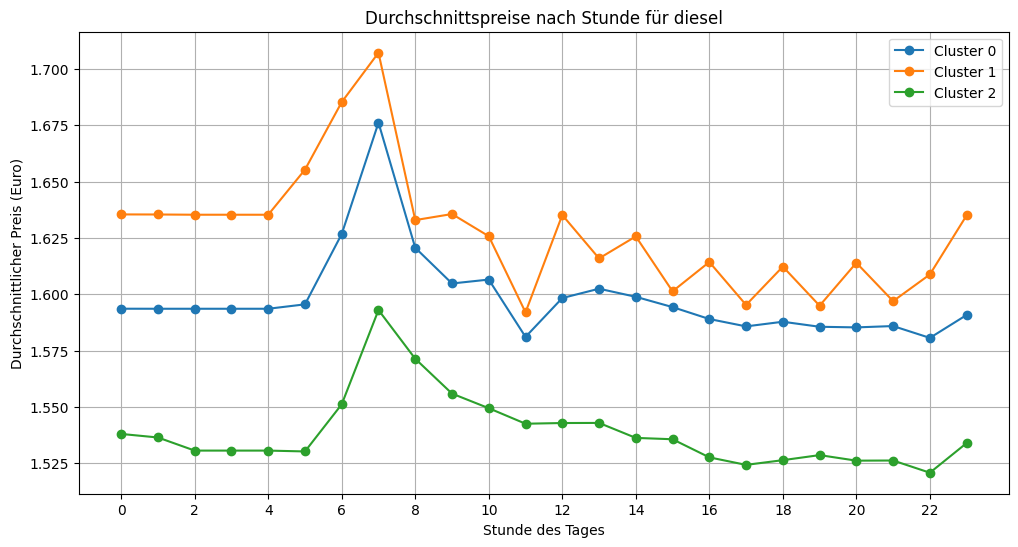

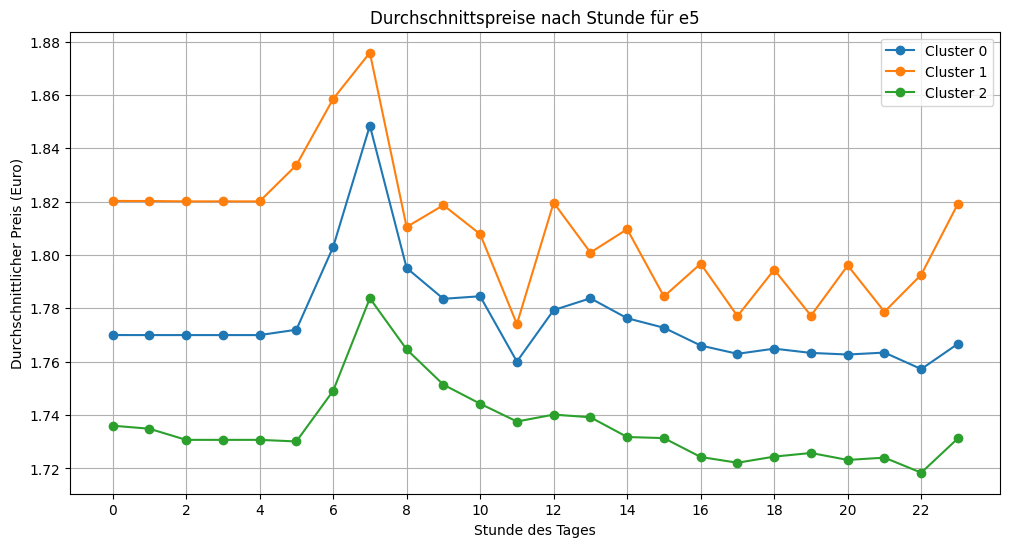

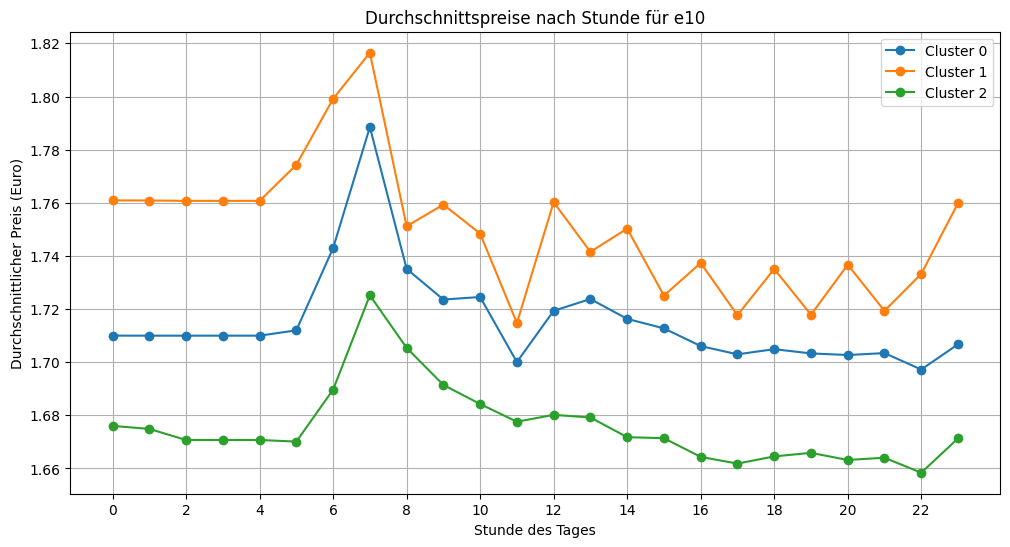

In [ ]:
# Berechnung der durchschnittlichen Preise nach Stunde und Cluster
avg_price_by_hour_cluster = merged_with_clusters.groupby(['cluster', 'hour'])[price_columns].mean().reset_index()

# Visualisierung der durchschnittlichen Preise nach Stunde für Diesel, E5 und E10 in jedem Cluster

for fuel in price_columns:
    plt.figure(figsize=(12, 6))
    for cluster in avg_price_by_hour_cluster['cluster'].unique():
        cluster_data = avg_price_by_hour_cluster[avg_price_by_hour_cluster['cluster'] == cluster]
        plt.plot(cluster_data['hour'], cluster_data[fuel], marker='o', label=f'Cluster {cluster}')

    plt.title(f'Durchschnittspreise nach Stunde für {fuel}')
    plt.xlabel('Stunde des Tages')
    plt.ylabel('Durchschnittlicher Preis (Euro)')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=range(0, 24, 2))  # Zeigt jede zweite Stunde auf der x-Achse
    plt.show()





**Interpretation und Beschreibung:**

Alle drei Kraftstoffarten weisen weitestgehend gleiche Muster auf. Cluster 1 hat klar die teuersten Preise, während Cluster 2 am günstigsten ist und Cluster 0 sich genau dazwischen befindet. In der Nacht sind die Preise in allen drei Clustern sehr konstant. In den Morgenstunden hat Cluster 0 von 5-7 Uhr den größten Anstieg, um den Berufsverkehr zu nutzen. Um 8 Uhr beginnen alle drei Cluster die Preise zu senken, so dass um 11 Uhr in den Clustern 0 und 1 ein Preistief erreicht wird. Im Laufe des Nachmittags sinken die Preise in Cluster 0 und 2 moderat und ohne große Schwnakungen, während Cluster 1 die Preise sehr stark schwanken. Dies könnte darauf hindeuten, dass Cluster 1 im Nachmittags Berufsverkehr die Nachfragepeaks gezielt durch Preiserhöhungen ausnutzt. Von 22 auf 23 Uhr steigen die Preise in allen CLustern nochmal an, wobei Cluster 1 die Preise über die Nacht am deutlichsten erhöht.

**Durchschnittspreise nach Wochentag**

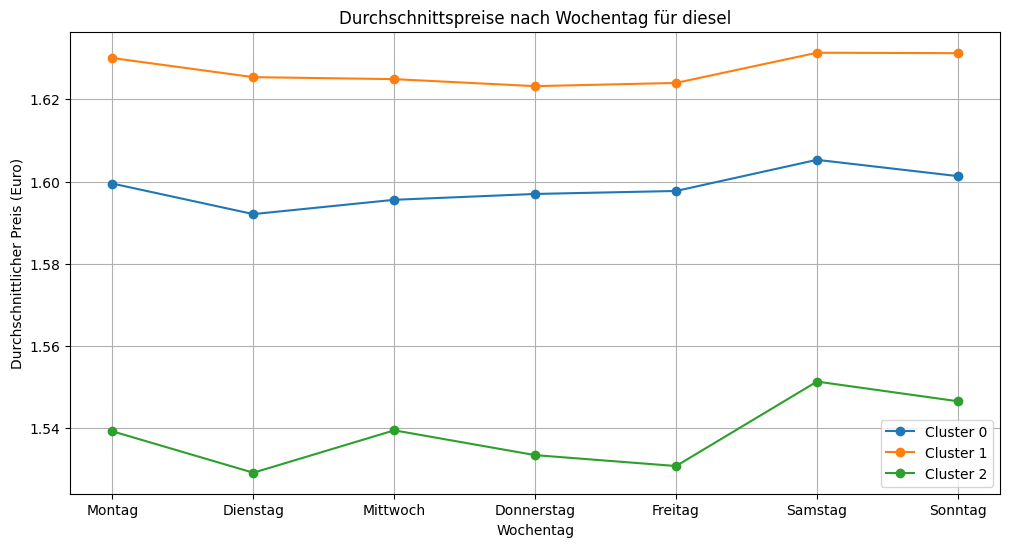

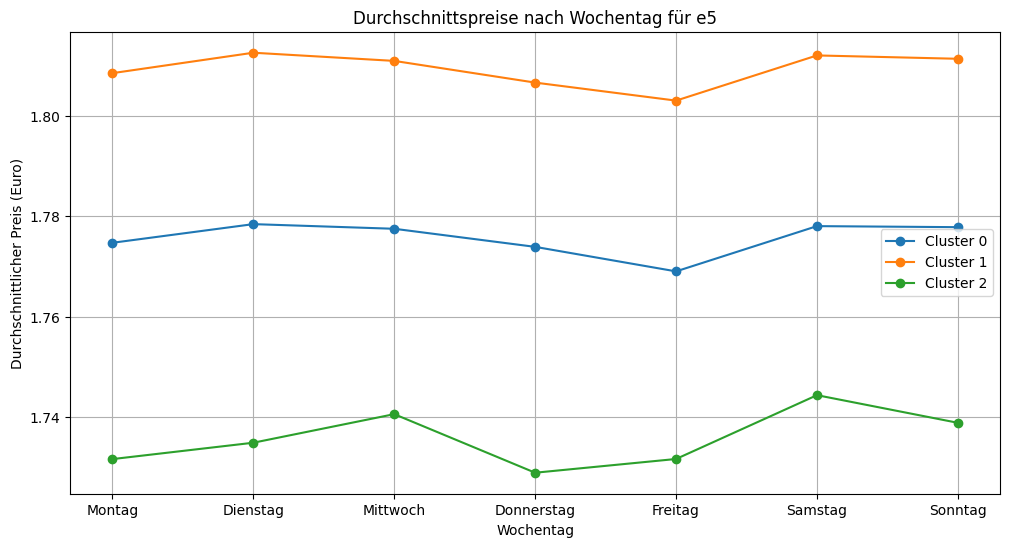

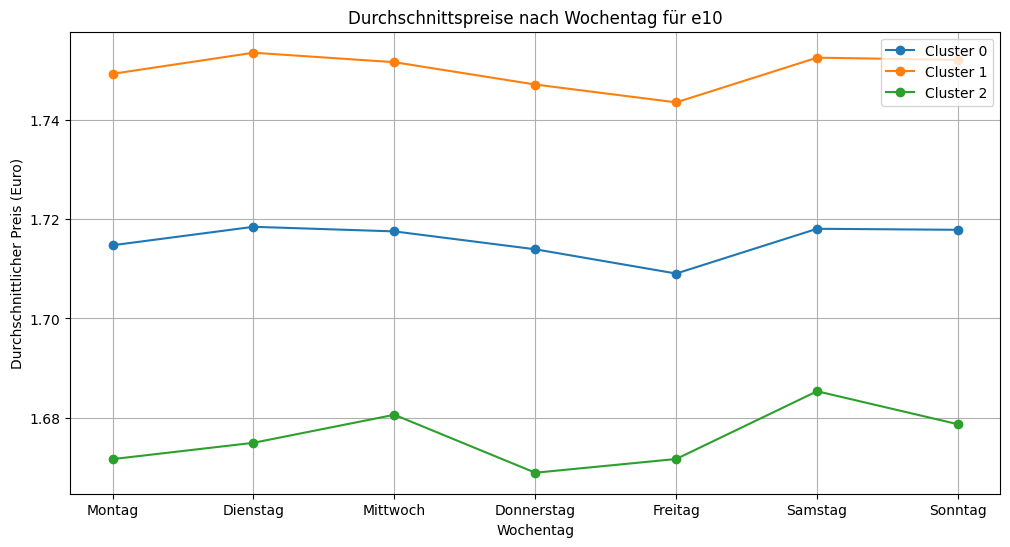

In [ ]:
import matplotlib.pyplot as plt

# Berechnung der durchschnittlichen Preise nach Wochentag und Cluster
avg_price_by_weekday_cluster = merged_with_clusters.groupby(['cluster', 'weekday'])[price_columns].mean().reset_index()

# Visualisierung der durchschnittlichen Preise nach Wochentag für Diesel, E5 und E10 in jedem Cluster
# Wochentagsnamen für die x-Achse
weekday_names = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']

for fuel in price_columns:
    plt.figure(figsize=(12, 6))
    for cluster in avg_price_by_weekday_cluster['cluster'].unique():
        cluster_data = avg_price_by_weekday_cluster[avg_price_by_weekday_cluster['cluster'] == cluster]
        plt.plot(cluster_data['weekday'], cluster_data[fuel], marker='o', label=f'Cluster {cluster}')

    plt.title(f'Durchschnittspreise nach Wochentag für {fuel}')
    plt.xlabel('Wochentag')
    plt.ylabel('Durchschnittlicher Preis (Euro)')
    plt.legend()
    plt.grid(True)
    plt.xticks(ticks=range(7), labels=weekday_names)  # Wochentagsnamen anzeigen
    plt.show()




**Beschreibung und Interpretation**

**Diesel Preise**
Cluster 0 zeigt konstante, mittlere Preise über die Woche hinweg, mit einem leichten Abfall am Dienstag und einem Anstieg am Freitag und Samstag. Cluster 1 hat durchgehend höhere Preise, ebenfalls mit einem Anstieg zum Wochenende hin. Cluster 2 hat die niedrigsten Preise, die am Montag am höchsten und am Mittwoch am niedrigsten sind. Insgesamt zeigen die Dieselpreise eine Tendenz zu höheren Preisen gegen Ende der Woche, besonders in Cluster 1.

**E5 Preise**
Auch hier sind die Preise in Cluster 1 durchgehend am höchsten, mit einem besonders markanten Anstieg am Freitag. Cluster 0 zeigt relativ stabile Preise, die am Dienstag leicht ansteigen und am Freitag wieder sinken. Cluster 2 hat die niedrigsten Preise, die am Freitag am höchsten und am Montag am niedrigsten sind. Im Vergleich zu Diesel zeigt E5 stärkere Preisschwankungen im Verlauf der Woche, insbesondere in Cluster 1.

**E10 Preise**
Hier zeigt sich ein ähnliches Muster wie bei E5, wobei Cluster 1 durchgehend die höchsten Preise aufweist, die am Freitag ihren Höhepunkt erreichen. Cluster 0 zeigt relativ stabile Preise, die am Mittwoch leicht sinken. Cluster 2 hat die niedrigsten Preise, die am Samstag am höchsten und am Montag am niedrigsten sind. Auch hier sind die Preisunterschiede zwischen den Clustern deutlich, mit einem Trend zu höheren Preisen gegen Ende der Woche in Cluster 1.



 **Durchschnittliche Höhe der Preisänderungen**

   cluster  avg_diesel_increase  avg_diesel_decrease  avg_e5_increase  \
0        0             0.041793            -0.022130         0.040696   
1        1             0.051007            -0.031834         0.049675   
2        2             0.034908            -0.022209         0.032853   

   avg_e5_decrease  avg_e10_increase  avg_e10_decrease  
0        -0.021331          0.040696         -0.021331  
1        -0.029600          0.049675         -0.029604  
2        -0.020269          0.032821         -0.020270  


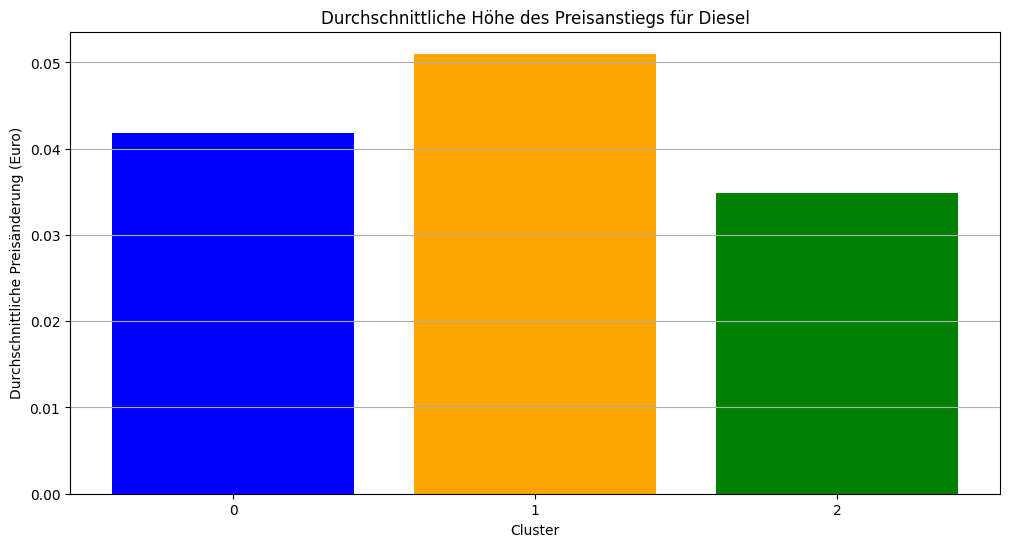

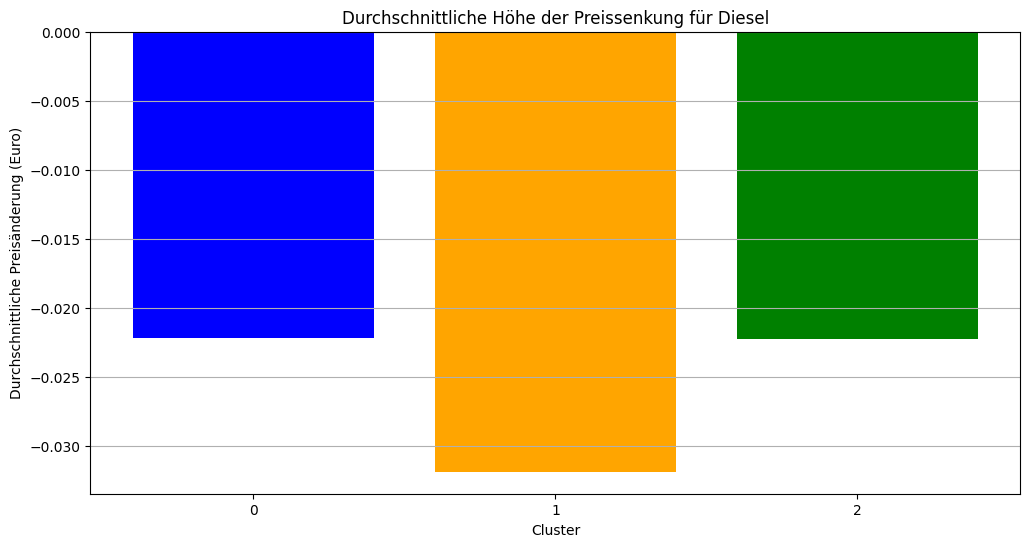

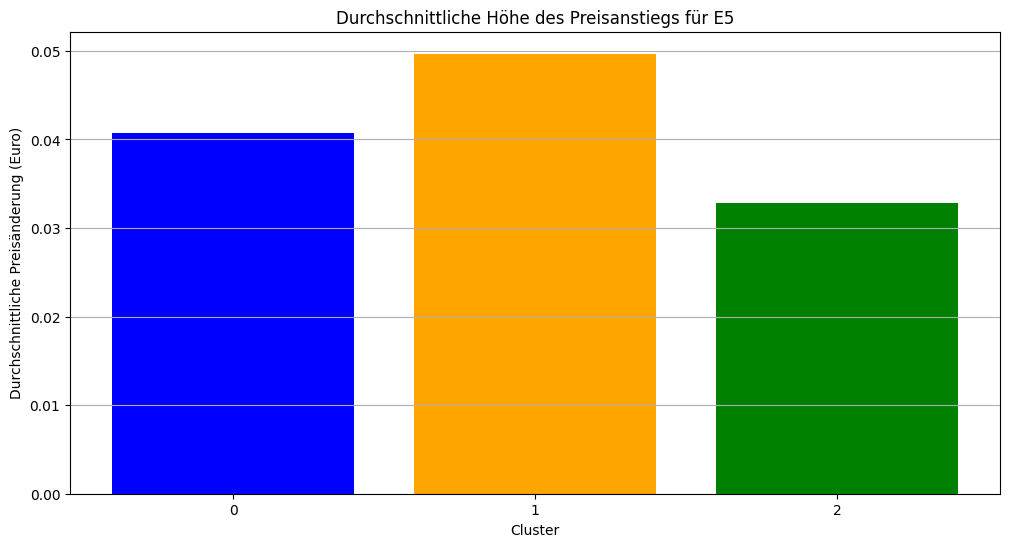

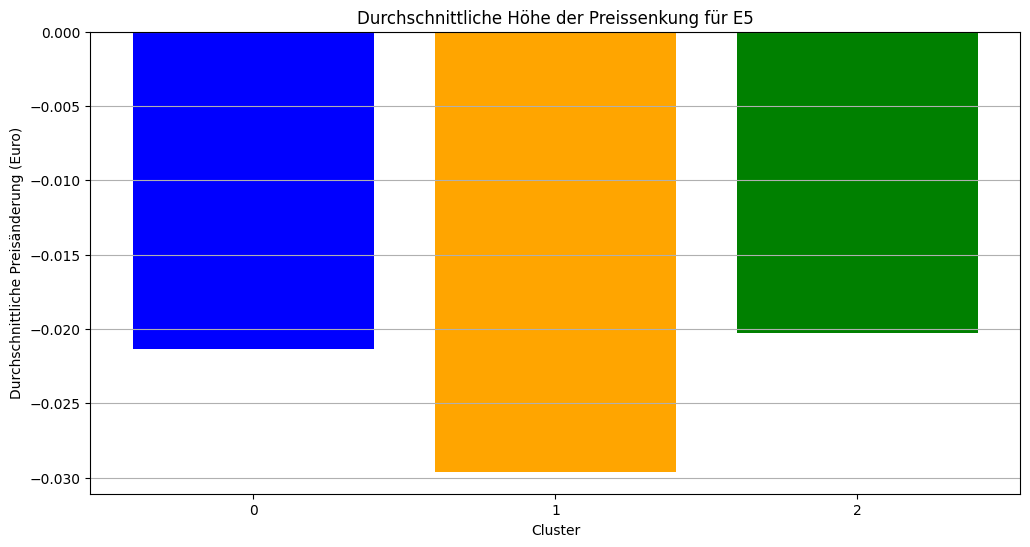

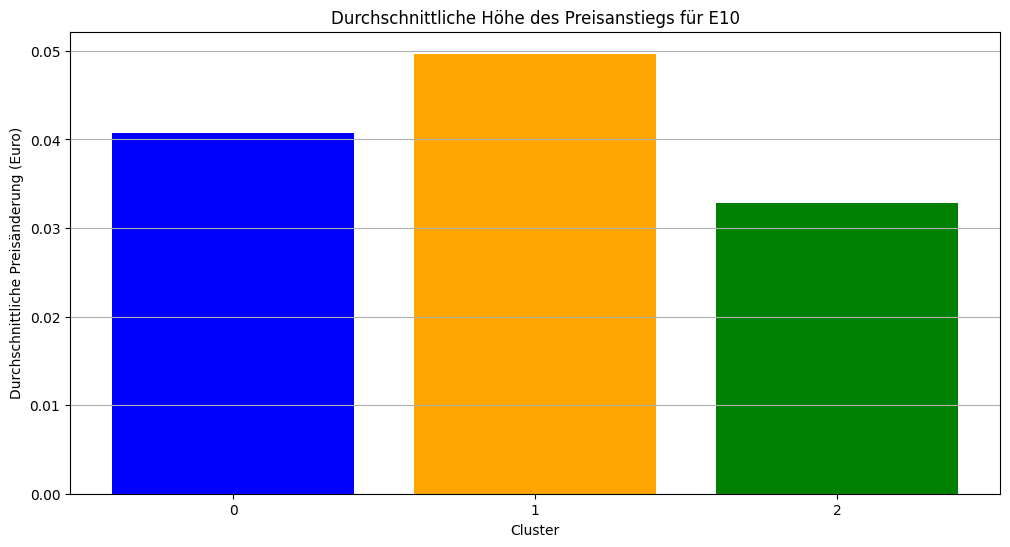

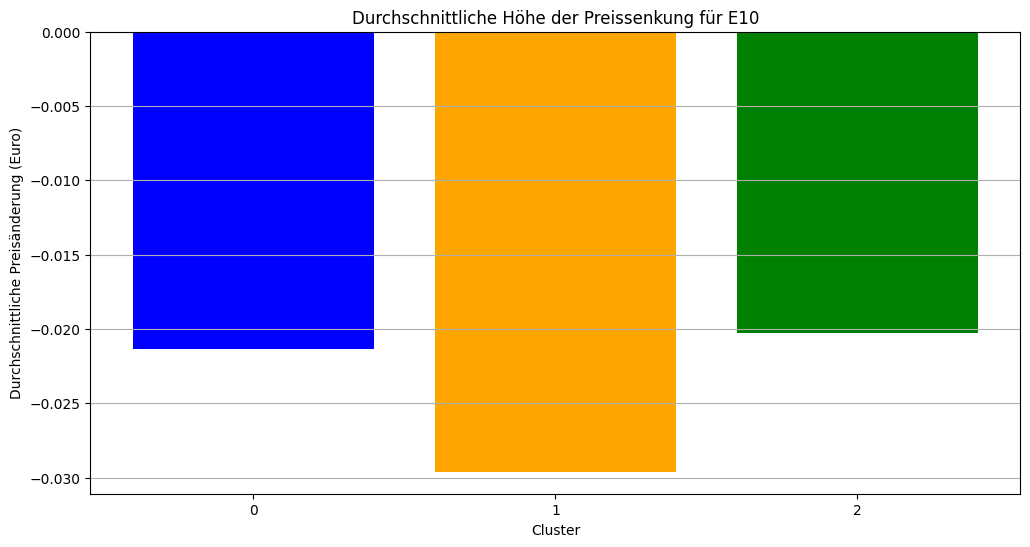

In [ ]:
# Berechnung der durchschnittlichen Höhe der Erhöhungen und Senkungen pro Cluster
avg_increase_decrease_cluster = merged_with_clusters.groupby('cluster').apply(
    lambda df: pd.Series({
        'avg_diesel_increase': df.loc[df['diesel_change_value'] > 0, 'diesel_change_value'].mean(),
        'avg_diesel_decrease': df.loc[df['diesel_change_value'] < 0, 'diesel_change_value'].mean(),
        'avg_e5_increase': df.loc[df['e5_change_value'] > 0, 'e5_change_value'].mean(),
        'avg_e5_decrease': df.loc[df['e5_change_value'] < 0, 'e5_change_value'].mean(),
        'avg_e10_increase': df.loc[df['e10_change_value'] > 0, 'e10_change_value'].mean(),
        'avg_e10_decrease': df.loc[df['e10_change_value'] < 0, 'e10_change_value'].mean()
    })
).reset_index()

# Überprüfung der Daten
print(avg_increase_decrease_cluster)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Visualisierung der durchschnittlichen Höhe der Preisänderungen für Diesel, E5 und E10 in jedem Cluster
change_types = {
    'avg_diesel_increase': 'Durchschnittliche Höhe des Preisanstiegs für Diesel',
    'avg_diesel_decrease': 'Durchschnittliche Höhe der Preissenkung für Diesel',
    'avg_e5_increase': 'Durchschnittliche Höhe des Preisanstiegs für E5',
    'avg_e5_decrease': 'Durchschnittliche Höhe der Preissenkung für E5',
    'avg_e10_increase': 'Durchschnittliche Höhe des Preisanstiegs für E10',
    'avg_e10_decrease': 'Durchschnittliche Höhe der Preissenkung für E10'
}

for change_type, title in change_types.items():
    plt.figure(figsize=(12, 6))
    plt.bar(avg_increase_decrease_cluster['cluster'], avg_increase_decrease_cluster[change_type], color=['blue', 'orange', 'green'])
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Durchschnittliche Preisänderung (Euro)')
    plt.xticks(avg_increase_decrease_cluster['cluster'])
    plt.grid(True, axis='y')
    plt.show()


**Beschreibung und Interpretation:**

Cluster 1 hat bei allen Kraftstoffarten die höchsten durchschnittlichen Preisanstiege und Preissenkungen, was auf eine aggressive Preisstrategie hinweist. Diese Tankstellen könnten häufige und signifikante Preisänderungen nutzen, um Kunden anzulocken und die Nachfrage zu steuern. Im Gegensatz dazu haben die Tankstellen in Cluster 2 die niedrigsten Preisänderungen, was auf eine stabilere Preisstrategie hinweist, die darauf abzielt, eine verlässliche Preiswahrnehmung zu schaffen. Cluster 0 zeigt moderate Preisänderungen und verfolgt somit eine ausgeglichene Strategie zwischen den Extremen der anderen beiden Cluster.

In [ ]:
# Ausgabe der Cluster-Zuweisungen
print(cluster_assignments)

             station_uuid  cluster
0           Access_Calwer        0
1             Aral_Armsel        1
2    Aral_KaiserFriedrich        1
3         Aral_Karlsruher        1
4         Aral_Lochaecker        1
5               BFT_Haupt        2
6            ENI_Hirsauer        1
7          ENI_Karlsruher        0
8             Esso_Calwer        1
9    Esso_KaiserFriedrich        1
10         JET_Karlsruher        0
11             JET_Luisen        0
12   MastOehlert_Blaecher        0
13            SB_Eutinger        2
14        Shell_Buchbusch        1
15     Shell_Wilferdinger        1
16        Shell_Zerrenner        1
17         TP_Braetzingen        2
18  Tankcenter_Wurmberger        0
19        Total_Breslauer        1


# Auswahl und Beschreibung der direkten Wettbewerber auf Basis der Clusteranalyse und geografischen Faktoren

**Interpretation der Cluster anahnd der Clusterzentren**

**Auswahl der direkten Wettbewerber**

Die Auswahl der direkten Wettbewerber erfolgt zum einen anhand der Ergebnisse aus der Clusteranalyse sowie aus der geografischen Lage innerhalb Pforzheims.

Die von uns ausgewählte Tankstelle "Aral_Lochaecker" wurde Cluster 1 zugeordnet. In diesem Cluster befinden sich folgende zehn Wettbewerber, die ähnliche Preisstrategien aufweisen und daher zum erweiterten Wettbewerbskreis zu zählen sind:

* Access_Calwer
* Aral_Armsel
* Aral_KaiserFriedrich
* Aral_Karlsruher
* Jet_Luisen
* SB_Eutinger
* Shell_Wilferdinger
* Shell_Zerrener
* Tankcenter_Wurmberger
* Total_Breslauer

Dennoch spielt die Lage einer Tankstelle ebenfalls eine entscheidende Rolle für ihre Preisstrategie. Daher haben wir uns neben der Clusterzugehörigkeit hauptsächlich auf Tankstellen konzentriert, die eine ähnliche geografische Lage wie die Aral Tankstelle in der Lochäcker Straße haben.

Die Lage der Aral Lochäcker lässt sich folgendermaßen beschreiben:

* An einer großen Bundesstraße (B294)
* Nahe der Autobahnauffart (Pf-Ost)
* Außerhalb der Innenstadt
* Im Gewerbegebiet gelegen

Als Wettbewerber haben wir weitere Tankstellen in Pforzheim identifiziert, die ähnliche Lageparameter aufweisen. Nachfolgend werden die Wettbewerber, ihre geografische Lage sowie ihr Cluster aufgeführt:

Shell_Buchbusch:
* An einer großen Bundesstraße (B294)
* Nahe der Autobahnauffart (Pf-Ost, nur auf der anderen Seite als die Aral_Lochäcker)
* Außerhalb der Innenstadt
* Im Gewerbegebiet gelegen
* Cluster: 0

Eni_Karlsruher, Jet_Karlsruher, Aral_Karlsruher:
* An einer großen Bundesstraße (B10)
* Nahe der Autobahnauffart (Pf-West)
* Außerhalb der Innenstadt
* Im Gewerbegebiet gelegen
* Cluster Eni & Jet: 0, Cluster Aral: 1


Somit haben wir insgesamt anhand der Lage 4 Wettbewerber identifiziert, wovon ein Wettbewerber ins selbe Cluster fällt wie die von uns gewählt Tankstelle und der Rest in Cluster 0 eingeordnet werden kann.




In [ ]:
# Filtern der Daten für die drei betrachteten Tankstellen
aral_shell_df = merged_df[merged_df['station_uuid'].isin(['Aral_Lochaecker', 'Shell_Buchbusch', 'Aral_Karlsruher'])]

# Speichern der gefilterten Daten als CSV-Datei
#aral_shell_df.to_csv('aral_shell_df.csv', index=True)

# Überprüfung der ersten Zeilen des gefilterten DataFrames
print(aral_shell_df.head())


                            date     station_uuid  diesel  e5  e10  \
129603 2024-05-26 00:00:00+02:00  Aral_Karlsruher     NaN NaN  NaN   
129604 2024-05-26 00:01:00+02:00  Aral_Karlsruher     NaN NaN  NaN   
129605 2024-05-26 00:02:00+02:00  Aral_Karlsruher     NaN NaN  NaN   
129606 2024-05-26 00:03:00+02:00  Aral_Karlsruher     NaN NaN  NaN   
129607 2024-05-26 00:04:00+02:00  Aral_Karlsruher     NaN NaN  NaN   

        dieselchange  e5change  e10change  hour  weekday  ...  \
129603           NaN       NaN        NaN     0        6  ...   
129604           NaN       NaN        NaN     0        6  ...   
129605           NaN       NaN        NaN     0        6  ...   
129606           NaN       NaN        NaN     0        6  ...   
129607           NaN       NaN        NaN     0        6  ...   

        time_since_last_change_diesel  time_since_last_change_e5  \
129603                            NaN                        NaN   
129604                            NaN               

**Identifikation der Wettbewerber aus den Clustern**

# Zeitreihenplots der Kraftstoffpreise für die zwei Wettbewerber und Aral_Lochaecker (gesamter Betrachtungszeitraum)

<ipython-input-50-c19df21cb814>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


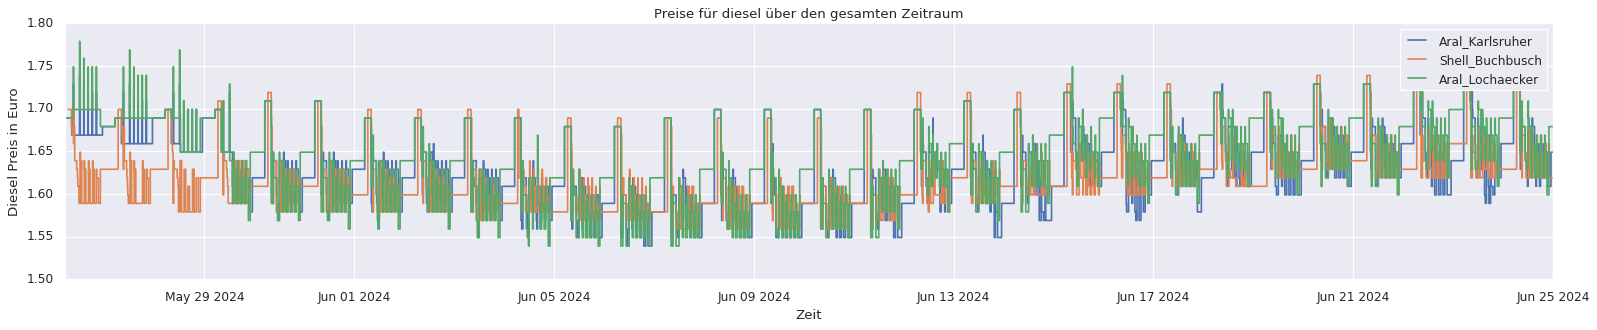

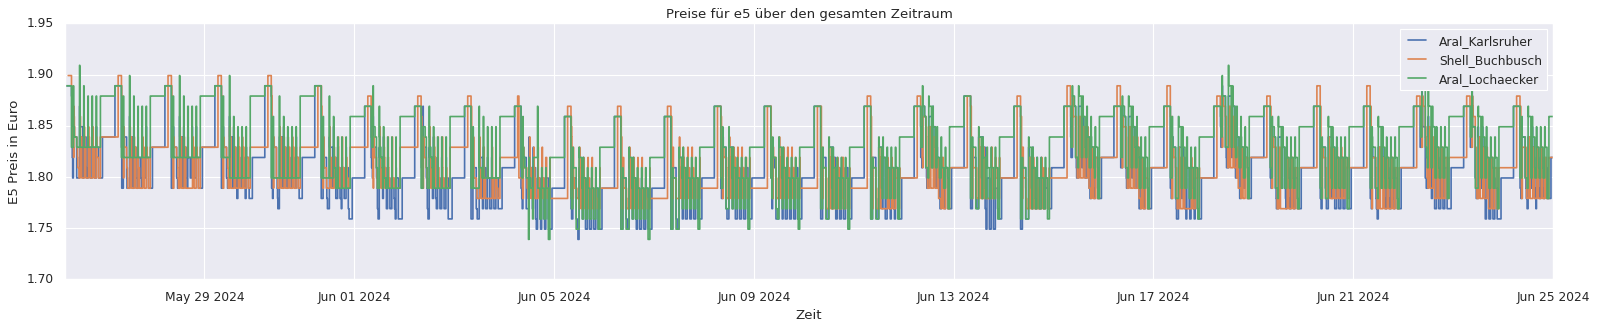

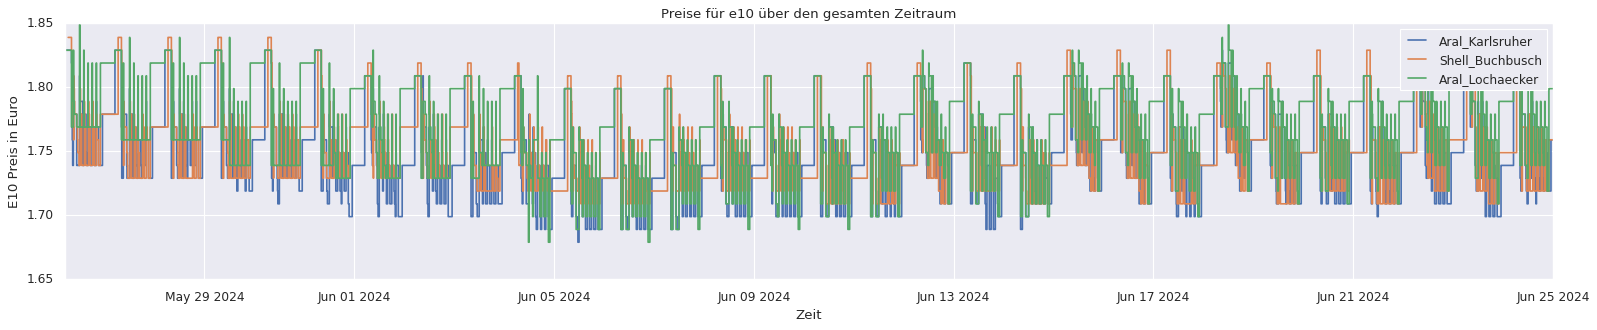

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konvertiere die 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen (kann aus dem DataFrame abgeleitet werden)
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filtere die Daten für die aktuelle Tankstelle
        df = aral_shell_df[aral_shell_df['station_uuid'] == station_id]

        # Erstelle den Plot
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Titel und Labels hinzufügen
    plt.title(f'Preise für {fuel} über den gesamten Zeitraum')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Zeige den Plot
    plt.show()


# Interpretation GESAMT:

### Ergänzende Interpretation der drei Tankstellen

#### Aral_Lochaecker (grüne Linie)
- **Preisstrategie**: Aral_Lochaecker zeigt eine sehr dynamische Preisstrategie mit häufigen und ausgeprägten Preisschwankungen. Diese Volatilität deutet darauf hin, dass die Tankstelle versucht, auf Marktveränderungen und Wettbewerberpreise schnell zu reagieren.
- **Positionierung**: Die höheren Preise könnten darauf hindeuten, dass Aral_Lochaecker eine Premium-Positionierung anstrebt oder sich in einer Lage befindet, wo die Kundschaft weniger preissensibel ist.

#### Shell_Buchbusch (orange Linie)
- **Preisstrategie**: Shell_Buchbusch weist eine stabilere und insgesamt günstigere Preisstruktur auf. Die moderaten täglichen Schwankungen deuten auf eine weniger aggressive Preisstrategie hin, die möglicherweise darauf abzielt, Kunden durch konsistent niedrigere Preise zu binden.
- **Positionierung**: Die niedrigeren Preise deuten darauf hin, dass Shell_Buchbusch versucht, preisbewusste Kunden anzusprechen und sich durch günstige Preise von den Wettbewerbern abzuheben. Die stabile und niedrigere Preisstruktur könnte Shell_Buchbusch einen Wettbewerbsvorteil verschaffen, insbesondere bei preissensiblen Kunden, die nach den besten Angeboten suchen.

#### Aral_Karlsruher (blaue Linie)
- **Preisstrategie**: Aral_Karlsruher zeigt eine mittlere Volatilität und Preisstruktur, die zwischen den Strategien von Aral_Lochaecker und Shell_Buchbusch liegt. Die Tankstelle passt die Preise ebenfalls regelmäßig an, jedoch nicht so ausgeprägt wie Aral_Lochaecker.
- **Positionierung**: Aral_Karlsruher scheint eine Balance zwischen Preis und Stabilität zu suchen, was auf eine Strategie hindeutet, sowohl preisbewusste als auch markentreue Kunden anzusprechen.


*Diesel*

####Aral_Lochaecker (grüne Linie)


Beschreibung:
Diese Tankstelle zeigt häufige und ausgeprägte Preisschwankungen über den gesamten Zeitraum. Die Preise tendieren dazu, im Vergleich zu den anderen beiden Tankstellen höher zu sein. Es gibt deutliche tägliche Schwankungen, was auf eine dynamische Preisstrategie hindeutet.

Muster: Hohe Volatilität mit regelmäßigen Preisspitzen und -tälern. Insgesamt höhere Preisniveaus.

####Shell_Buchbusch (orange Linie)
- Beschreibung:
Diese Tankstelle hat insgesamt niedrigere Preise als die beiden Aral-Tankstellen, besonders in den ersten Tagen des Zeitraums. Die Preisschwankungen sind weniger ausgeprägt, was auf eine stabilere Preisstrategie hinweist.

- Muster: Weniger volatile Preise, häufig niedriger als die der Wettbewerber, mit moderaten täglichen Schwankungen.

####Aral_Karlsruher (blaue Linie)

- Beschreibung:
Diese Tankstelle hat ähnliche Preismuster wie Aral_Lochaecker, aber die Schwankungen sind weniger ausgeprägt. Die Preise sind in der Regel etwas niedriger als bei Aral_Lochaecker.

- Muster: Moderate Volatilität, ähnliche Preisverläufe wie bei Aral_Lochaecker, aber tendenziell geringere Schwankungen.


####Zusammenfassung der Beobachtungen DIESEL


- Preisniveaus und Muster: Alle drei Tankstellen zeigen tägliche Schwankungen im Dieselpreis. Aral_Lochaecker zeigt die ausgeprägtesten Preisschwankungen und tendiert zu höheren Preisen. Shell_Buchbusch hat insgesamt die niedrigsten Preise.

- Zeitliche Trends: Ein klarer Abwärtstrend in den ersten Tagen, gefolgt von stabileren Preisen in der zweiten Hälfte des Zeitraums.

- Vergleich der Tankstellen: Shell_Buchbusch ist insgesamt preisgünstiger, während Aral_Lochaecker höhere Preise und eine höhere Volatilität aufweist. Aral_Karlsruher liegt preislich und in der Volatilität zwischen den beiden anderen Tankstellen.

- Volatilität: Aral_Lochaecker hat die höchste Volatilität, was auf eine flexible Preisstrategie hinweist, während Shell_Buchbusch stabilere Preise hat.




*E5*

#### Aral_Lochaecker (grüne Linie)
- **Beschreibung**: Diese Tankstelle zeigt über den gesamten Zeitraum hinweg häufige und ausgeprägte Preisschwankungen. Die Preise für E5 liegen tendenziell höher im Vergleich zu den anderen beiden Tankstellen.
- **Muster**: Hohe Volatilität mit regelmäßigen Preisspitzen und -tälern. Insgesamt höhere Preisniveaus.

#### Shell_Buchbusch (orange Linie)
- **Beschreibung**: Diese Tankstelle weist insgesamt niedrigere Preise auf als die beiden Aral-Tankstellen, insbesondere zu Beginn des Zeitraums. Die Preisschwankungen sind moderater, was auf eine stabilere Preisstrategie hinweist.
- **Muster**: Weniger volatile Preise, häufig niedriger als die der Wettbewerber, mit moderaten täglichen Schwankungen.

#### Aral_Karlsruher (blaue Linie)
- **Beschreibung**: Diese Tankstelle hat ähnliche Preismuster wie Aral_Lochaecker, aber die Schwankungen sind weniger ausgeprägt. Die Preise sind in der Regel etwas niedriger als bei Aral_Lochaecker.
- **Muster**: Moderate Volatilität, ähnliche Preisverläufe wie bei Aral_Lochaecker, aber tendenziell geringere Schwankungen.

### Zusammenfassung der Beobachtungen E5
- **Preisniveaus und Muster**: Alle drei Tankstellen zeigen tägliche Schwankungen im E5-Preis. Aral_Lochaecker zeigt die ausgeprägtesten Preisschwankungen und tendiert zu höheren Preisen. Shell_Buchbusch hat insgesamt die niedrigsten Preise.
- **Zeitliche Trends**: Ein klarer Abwärtstrend in den ersten Tagen, gefolgt von stabileren Preisen in der zweiten Hälfte des Zeitraums.
- **Vergleich der Tankstellen**: Shell_Buchbusch ist insgesamt preisgünstiger, während Aral_Lochaecker höhere Preise und eine höhere Volatilität aufweist. Aral_Karlsruher liegt preislich und in der Volatilität zwischen den beiden anderen Tankstellen.
- **Volatilität**: Aral_Lochaecker hat die höchste Volatilität, was auf eine flexible Preisstrategie hinweist, während Shell_Buchbusch stabilere Preise hat.




*E10*

#### Aral_Lochaecker (grüne Linie)
- **Beschreibung**: Diese Tankstelle zeigt über den gesamten Zeitraum hinweg häufige und ausgeprägte Preisschwankungen. Die Preise für E10 liegen tendenziell höher im Vergleich zu den anderen beiden Tankstellen.
- **Muster**: Hohe Volatilität mit regelmäßigen Preisspitzen und -tälern. Insgesamt höhere Preisniveaus.

#### Shell_Buchbusch (orange Linie)
- **Beschreibung**: Diese Tankstelle weist insgesamt niedrigere Preise auf als die beiden Aral-Tankstellen, insbesondere zu Beginn des Zeitraums. Die Preisschwankungen sind moderater, was auf eine stabilere Preisstrategie hinweist.
- **Muster**: Weniger volatile Preise, häufig niedriger als die der Wettbewerber, mit moderaten täglichen Schwankungen.

#### Aral_Karlsruher (blaue Linie)
- **Beschreibung**: Diese Tankstelle hat ähnliche Preismuster wie Aral_Lochaecker, aber die Schwankungen sind weniger ausgeprägt. Die Preise sind in der Regel etwas niedriger als bei Aral_Lochaecker.
- **Muster**: Moderate Volatilität, ähnliche Preisverläufe wie bei Aral_Lochaecker, aber tendenziell geringere Schwankungen.

### Zusammenfassung der Beobachtungen E10
- **Preisniveaus und Muster**: Alle drei Tankstellen zeigen tägliche Schwankungen im E10-Preis. Aral_Lochaecker zeigt die ausgeprägtesten Preisschwankungen und tendiert zu höheren Preisen. Shell_Buchbusch hat insgesamt die niedrigsten Preise.
- **Zeitliche Trends**: Ein klarer Abwärtstrend in den ersten Tagen, gefolgt von stabileren Preisen in der zweiten Hälfte des Zeitraums.
- **Vergleich der Tankstellen**: Shell_Buchbusch ist insgesamt preisgünstiger, während Aral_Lochaecker höhere Preise und eine höhere Volatilität aufweist. Aral_Karlsruher liegt preislich und in der Volatilität zwischen den beiden anderen Tankstellen.
- **Volatilität**: Aral_Lochaecker hat die höchste Volatilität, was auf eine flexible Preisstrategie hinweist, während Shell_Buchbusch stabilere Preise hat.



# Zeitreihenplots der Kraftstoffpreise für die zwei Wettbewerber und Aral_Lochaecker (für eine Woche im Betrachtungszeitraum)


**Plot für eine bestimmte Woche**

<ipython-input-51-59d4ac477d83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


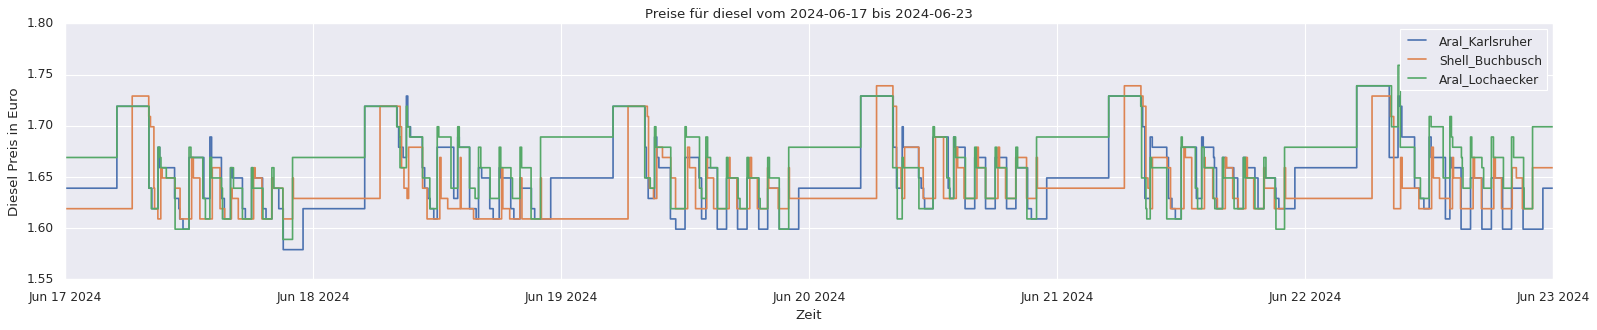

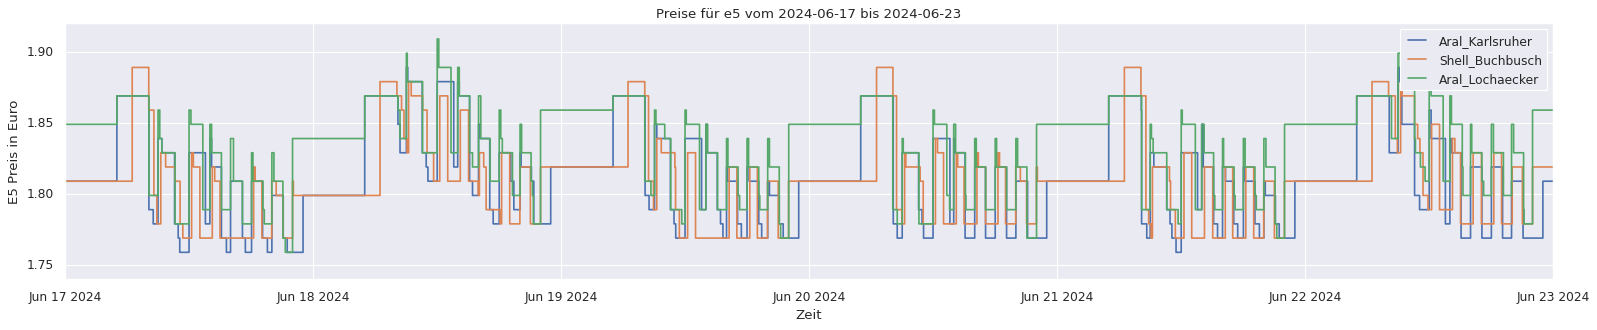

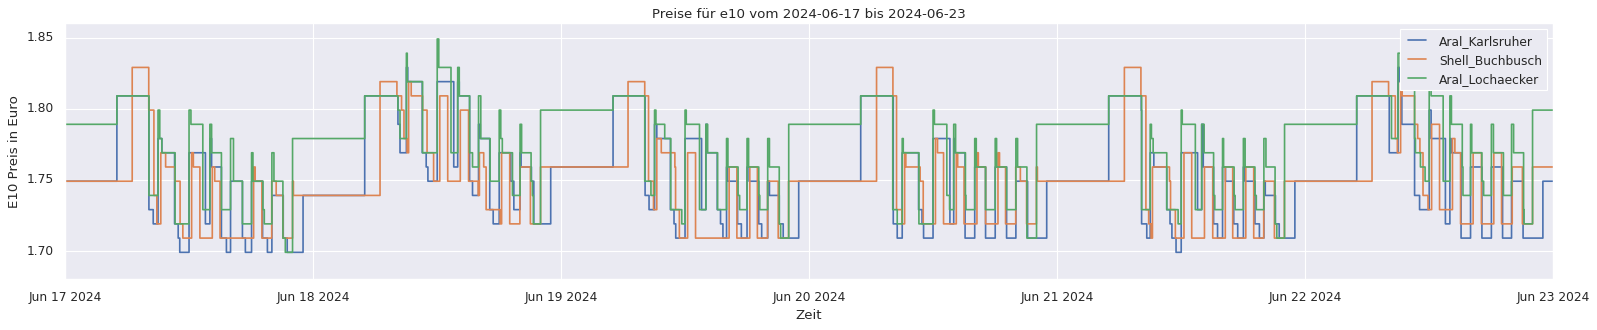

In [ ]:
# Konvertiere die 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen (kann aus dem DataFrame abgeleitet werden)
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Bestimme den Zeitraum der Woche
start_date = '2024-06-17'
end_date = '2024-06-23'

# Filtere die Daten für die angegebene Woche
week_data = aral_shell_df[(aral_shell_df['date'] >= start_date) & (aral_shell_df['date'] <= end_date)]

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filtere die Daten für die aktuelle Tankstelle und die Woche
        df = week_data[week_data['station_uuid'] == station_id]

        # Erstelle den Plot
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Titel und Labels hinzufügen
    plt.title(f'Preise für {fuel} vom {start_date} bis {end_date}')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Zeige den Plot
    plt.show()

### Interpretation der Wochendurchschnittspreise für die drei Kraftstoffarten

#### Dieselpreise (17.06.2024 - 23.06.2024)

- **Aral_Karlsruher**
  - Der Dieselpreis schwankt zwischen 1,60 Euro und 1,70 Euro.
  - Zeigt eine Tendenz zu häufigeren Preisänderungen, besonders in den frühen Morgenstunden und späten Abendstunden.
  - Dies könnte darauf hindeuten, dass die Tankstelle versucht, ihre Preise dynamisch an die Nachfrage anzupassen, insbesondere zu Spitzenzeiten.

- **Shell_Buchbusch**
  - Der Dieselpreis bleibt relativ konstant, mit einer leichten Volatilität zwischen 1,60 Euro und 1,65 Euro.
  - Weniger häufige Preisänderungen im Vergleich zu Aral_Karlsruher und Aral_Lochaecker.
  - Diese Stabilität deutet auf eine Strategie hin, die preissensible Kunden durch konsistente und vorhersehbare Preise anzieht.

- **Aral_Lochaecker**
  - Der Dieselpreis zeigt starke Schwankungen, oft zwischen 1,60 Euro und 1,75 Euro.
  - Besonders auffällig sind die hohen Preise zu Beginn der Woche und die Reduzierung gegen Ende der Woche.
  - Diese Preisstrategie könnte darauf abzielen, die höhere Nachfrage zu Wochenbeginn optimal auszunutzen.

#### E5-Preise (17.06.2024 - 23.06.2024)

- **Aral_Karlsruher**
  - Der Preis für E5 schwankt zwischen 1,80 Euro und 1,85 Euro.
  - Häufige Preisänderungen, besonders in den frühen Morgenstunden, deuten auf eine dynamische Anpassung an Marktbedingungen hin.
  - Dies könnte eine Reaktion auf kurzfristige Nachfrageänderungen sein, um Wettbewerbsfähigkeit zu gewährleisten.

- **Shell_Buchbusch**
  - Der E5-Preis bleibt relativ stabil, mit Schwankungen zwischen 1,75 Euro und 1,85 Euro.
  - Preisänderungen sind weniger häufig, was auf eine konservative Preisstrategie hindeutet.
  - Diese Stabilität könnte dazu dienen, eine treue Kundschaft zu gewinnen, die Wert auf konstante Preise legt.

- **Aral_Lochaecker**
  - Der E5-Preis zeigt signifikante Schwankungen, oft zwischen 1,75 Euro und 1,90 Euro.
  - Häufige Preisänderungen deuten darauf hin, dass die Tankstelle ihre Preise aktiv an die Nachfrage anpasst.
  - Besonders auffällig sind die hohen Preise zu Beginn und in der Mitte der Woche, was auf eine Strategie zur Margenmaximierung hinweisen könnte.

#### E10-Preise (17.06.2024 - 23.06.2024)

- **Aral_Karlsruher**
  - Der E10-Preis schwankt zwischen 1,70 Euro und 1,80 Euro.
  - Häufige Preisänderungen, besonders in den frühen Morgenstunden und gegen Abend.
  - Diese Dynamik könnte darauf abzielen, die Preise flexibel an die Nachfrage anzupassen und Wettbewerbsfähigkeit zu sichern.

- **Shell_Buchbusch**
  - Der E10-Preis bleibt relativ konstant, mit Schwankungen zwischen 1,70 Euro und 1,75 Euro.
  - Weniger häufige Preisänderungen, was auf eine stabile Preisstrategie hinweist.
  - Diese Stabilität könnte darauf abzielen, preissensible Kunden durch konsistente Preise zu binden.

- **Aral_Lochaecker**
  - Der E10-Preis zeigt deutliche Schwankungen, oft zwischen 1,70 Euro und 1,80 Euro.
  - Preisänderungen sind besonders häufig zu Wochenbeginn und in den frühen Morgenstunden.
  - Diese Preisstrategie könnte darauf abzielen, die Margen zu maximieren, indem sie die höhere Nachfrage zu bestimmten Zeiten ausnutzt.

### Gesamtvergleich und Wettbewerb

- **Preisstrategien**:
  - **Aral_Lochaecker**: Setzt auf hohe Preise und hohe Volatilität, um Margen zu maximieren. Die dynamischen Preisänderungen sowohl im Tages- als auch im Wochenverlauf zeigen eine aggressive Preisstrategie.
  - **Shell_Buchbusch**: Verfolgt eine stabile Preisstrategie mit niedrigen Preisen und geringer Volatilität, um preissensible Kunden langfristig zu binden.
  - **Aral_Karlsruher**: Bewegt sich preislich und in der Volatilität zwischen den beiden anderen Tankstellen, mit einer moderaten Preisstrategie, die sowohl preisbewusste als auch markentreue Kunden ansprechen soll.

- **Nachfrageanpassungen**:
  - **Aral_Lochaecker** und **Aral_Karlsruher**: Zeigen häufige Preisänderungen, insbesondere zu Spitzenzeiten und zu Wochenbeginn. Diese Flexibilität könnte darauf abzielen, die Preise optimal an die Nachfrage anzupassen und Wettbewerbsfähigkeit zu sichern.
  - **Shell_Buchbusch**: Setzt auf Preisstabilität, um eine treue Kundschaft zu gewinnen, die Wert auf konstante und vorhersehbare Preise legt.



# Zeitreihenplots der Kraftstoffpreise für die zwei Wettbewerber und Aral_Lochaecker (für einen bestimmten Tag im Betrachtungszeitraum)

**Plot für einen bestimmten Tag**

<ipython-input-52-bb0ab49a5fe8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


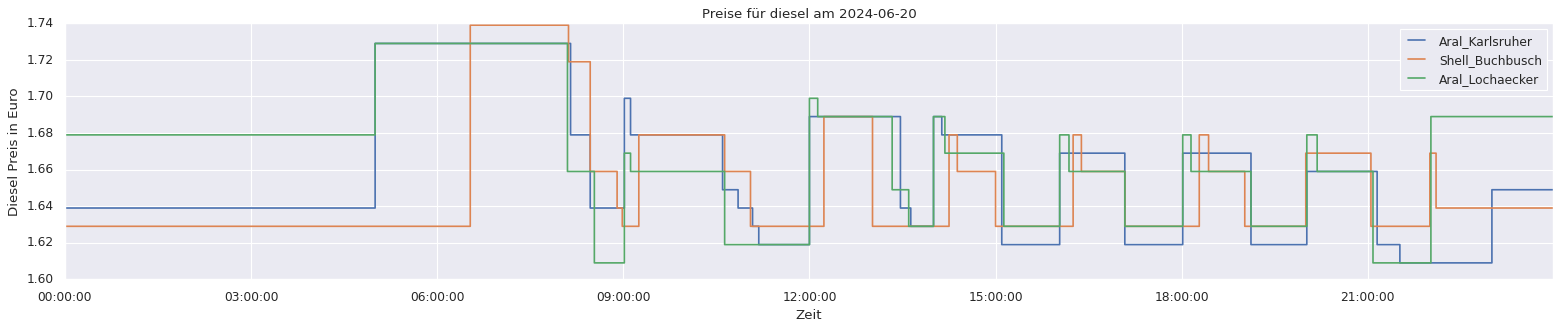

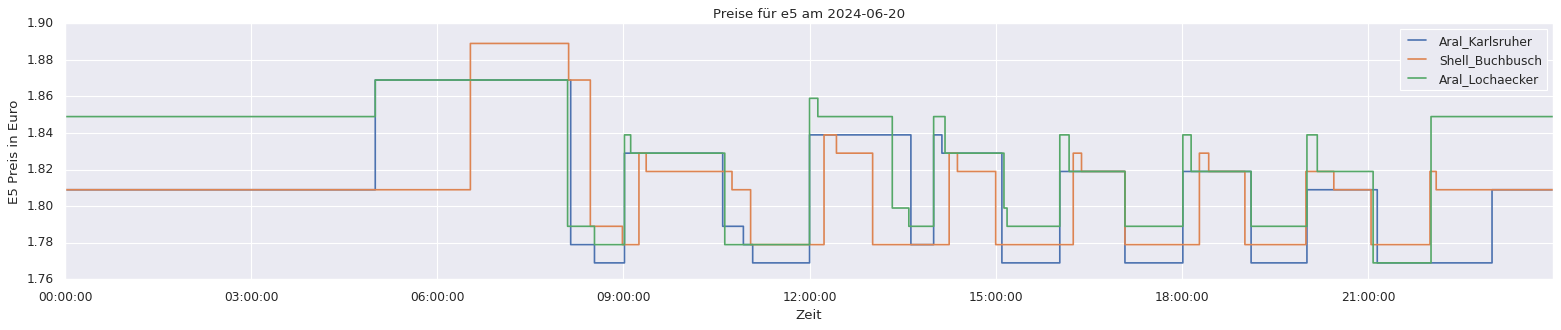

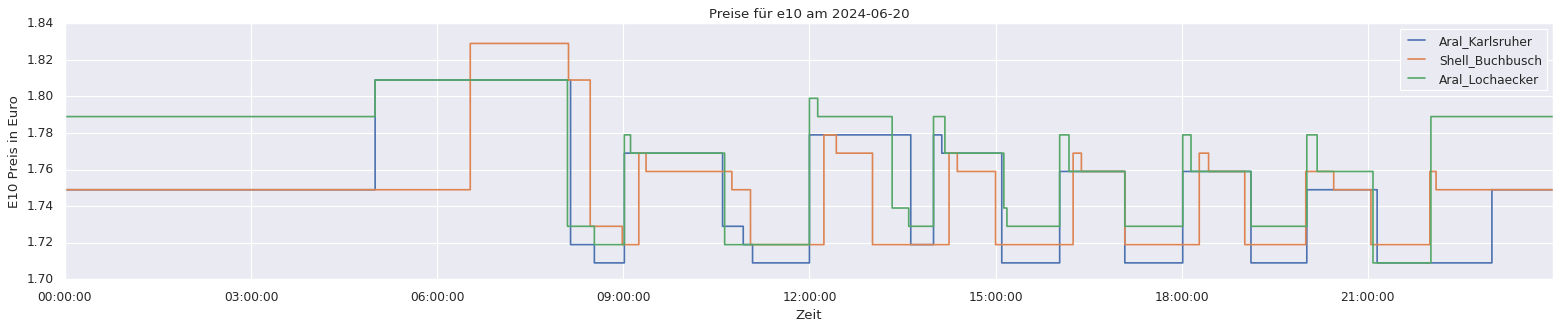

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konvertiere die 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen (kann aus dem DataFrame abgeleitet werden)
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Bestimme das Datum
selected_date = '2024-06-20'

# Filtere die Daten für das angegebene Datum
day_data = aral_shell_df[aral_shell_df['date'].dt.date == pd.to_datetime(selected_date).date()]

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filtere die Daten für die aktuelle Tankstelle und den Tag
        df = day_data[day_data['station_uuid'] == station_id]

        # Erstelle den Plot
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Titel und Labels hinzufügen
    plt.title(f'Preise für {fuel} am {selected_date}')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Zeige den Plot
    plt.show()


### Interpretation der Tagesdurchschnittspreise für die drei Kraftstoffarten am 20.06.2024

#### Dieselpreise

- **Aral_Karlsruher**
  - Der Dieselpreis beginnt bei 1,64 Euro und zeigt Schwankungen im Laufe des Tages. Die Preise erreichen ihren Höhepunkt gegen 6 Uhr morgens bei 1,72 Euro, sinken dann wieder und fluktuieren bis zum Abend.
  - Diese Preisstruktur deutet auf eine dynamische Anpassung an die morgendliche Nachfrage hin, gefolgt von Anpassungen basierend auf den Wettbewerbsaktivitäten und der Nachfrage im Laufe des Tages.

- **Shell_Buchbusch**
  - Der Dieselpreis startet bei 1,62 Euro, steigt kurzzeitig auf 1,74 Euro am frühen Morgen und zeigt dann Schwankungen im Tagesverlauf, um sich schließlich bei etwa 1,64 Euro am Abend einzupendeln.
  - Shell_Buchbusch weist im Vergleich zu den anderen Tankstellen eine geringere Anzahl an Preisänderungen auf, was auf eine stabilere und konservativere Preisstrategie hinweist.

- **Aral_Lochaecker**
  - Der Dieselpreis beginnt bei 1,68 Euro, steigt auf 1,74 Euro am frühen Morgen und fluktuiert dann stark über den Tag hinweg, wobei er bis auf 1,60 Euro sinkt und gegen Abend wieder steigt.
  - Diese starke Volatilität deutet darauf hin, dass Aral_Lochaecker aggressiv auf kurzfristige Nachfrageänderungen reagiert, um Wettbewerbsvorteile zu nutzen.

#### E5-Preise

- **Aral_Karlsruher**
  - Der E5-Preis beginnt bei 1,82 Euro, erreicht einen Höchststand von 1,86 Euro gegen 6 Uhr morgens und zeigt dann Schwankungen im Laufe des Tages, wobei der Preis gegen Abend auf 1,82 Euro sinkt.
  - Die Preise bei Aral_Karlsruher spiegeln eine flexible Anpassung an die morgendliche Nachfrage und die Wettbewerbsaktivitäten wider.

- **Shell_Buchbusch**
  - Der E5-Preis startet bei 1,80 Euro, steigt kurzzeitig auf 1,88 Euro und zeigt dann moderate Schwankungen über den Tag hinweg, um sich schließlich bei etwa 1,82 Euro am Abend einzupendeln.
  - Shell_Buchbusch zeigt weniger Preisänderungen, was auf eine stabilere Preisstrategie hinweist, die preissensible Kunden anzieht.

- **Aral_Lochaecker**
  - Der E5-Preis beginnt bei 1,84 Euro, steigt auf 1,88 Euro am frühen Morgen und fluktuiert dann stark über den Tag hinweg, wobei der Preis bis auf 1,76 Euro sinkt und gegen Abend wieder auf 1,84 Euro steigt.
  - Diese starke Volatilität zeigt, dass Aral_Lochaecker aggressiv auf kurzfristige Nachfrageänderungen reagiert, um die Margen zu maximieren.

#### E10-Preise

- **Aral_Karlsruher**
  - Der E10-Preis beginnt bei 1,76 Euro, erreicht einen Höchststand von 1,82 Euro gegen 6 Uhr morgens und zeigt dann Schwankungen im Laufe des Tages, wobei der Preis gegen Abend auf 1,76 Euro sinkt.
  - Die flexible Preisgestaltung bei Aral_Karlsruher zeigt eine Anpassung an die morgendliche Nachfrage und die Wettbewerbsbedingungen.

- **Shell_Buchbusch**
  - Der E10-Preis startet bei 1,74 Euro, steigt kurzzeitig auf 1,82 Euro und zeigt dann moderate Schwankungen über den Tag hinweg, um sich schließlich bei etwa 1,76 Euro am Abend einzupendeln.
  - Shell_Buchbusch zeigt weniger Preisänderungen, was auf eine stabilere Preisstrategie hinweist, die auf preissensible Kunden abzielt.

- **Aral_Lochaecker**
  - Der E10-Preis beginnt bei 1,78 Euro, steigt auf 1,82 Euro am frühen Morgen und fluktuiert dann stark über den Tag hinweg, wobei der Preis bis auf 1,72 Euro sinkt und gegen Abend wieder auf 1,78 Euro steigt.
  - Diese starke Volatilität zeigt, dass Aral_Lochaecker aggressiv auf kurzfristige Nachfrageänderungen reagiert, um Wettbewerbsvorteile zu nutzen.

### Gesamtvergleich und Wettbewerb

- **Aral_Karlsruher**: Zeigt eine dynamische Preisgestaltung mit häufigen Anpassungen, insbesondere am frühen Morgen. Diese Strategie zielt darauf ab, auf die morgendliche Nachfrage und die Wettbewerbsbedingungen zu reagieren.

- **Shell_Buchbusch**: Verfolgt eine stabilere Preisstrategie mit weniger Preisänderungen im Tagesverlauf. Diese Strategie zieht preissensible Kunden an, die Wert auf konstante und vorhersehbare Preise legen.

- **Aral_Lochaecker**: Zeigt die höchste Preisvolatilität und passt die Preise aggressiv an die Nachfrage und die Wettbewerbsbedingungen an. Diese Strategie zielt darauf ab, kurzfristige Wettbewerbsvorteile zu nutzen und die Margen zu maximieren.



# Zeitreihenplots der Kraftstoffpreise für die zwei Wettbewerber und Aral_Lochaecker (Berufsverkehr eines Tages im Betrachtungszeitraum)

**Zeitreihenplot für den Berufsverkehr eines bestimmten Tages**

**Berufsverkehr Morgens**

<ipython-input-53-bde9466b784c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


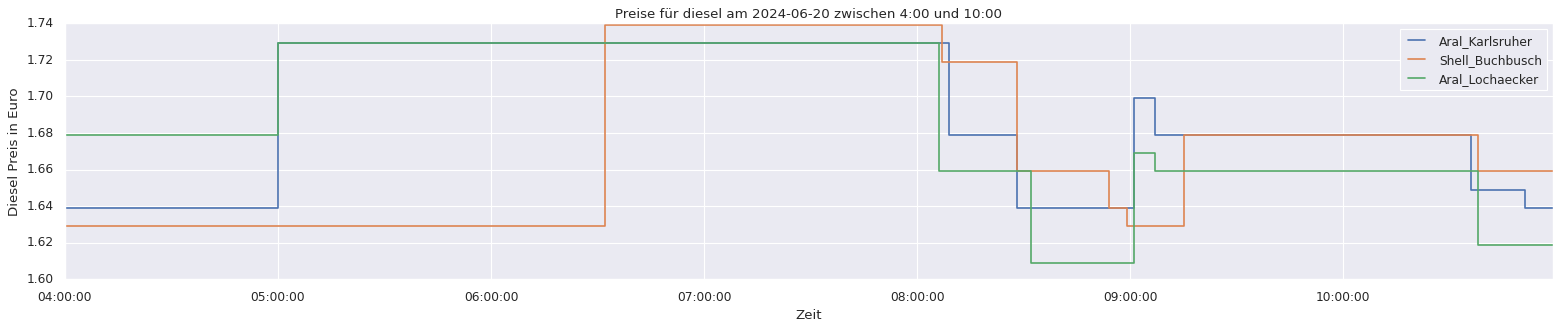

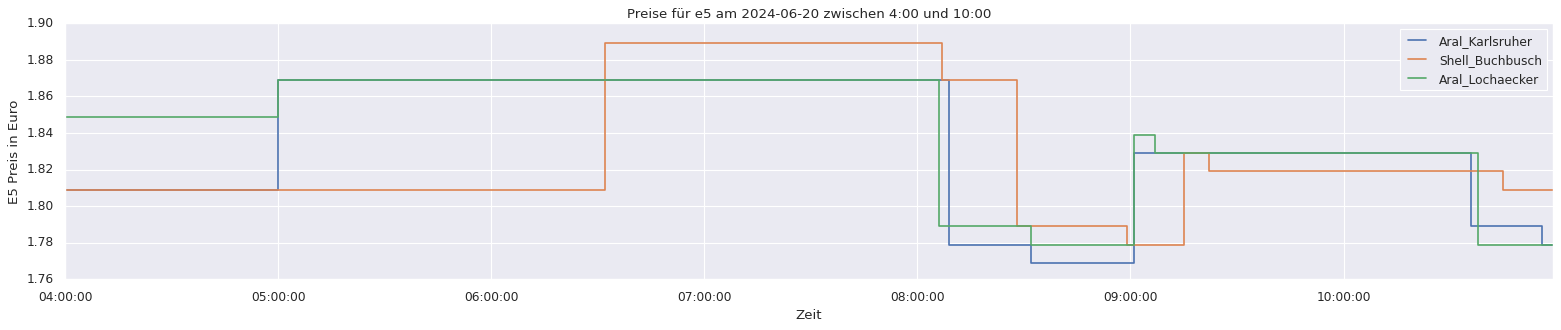

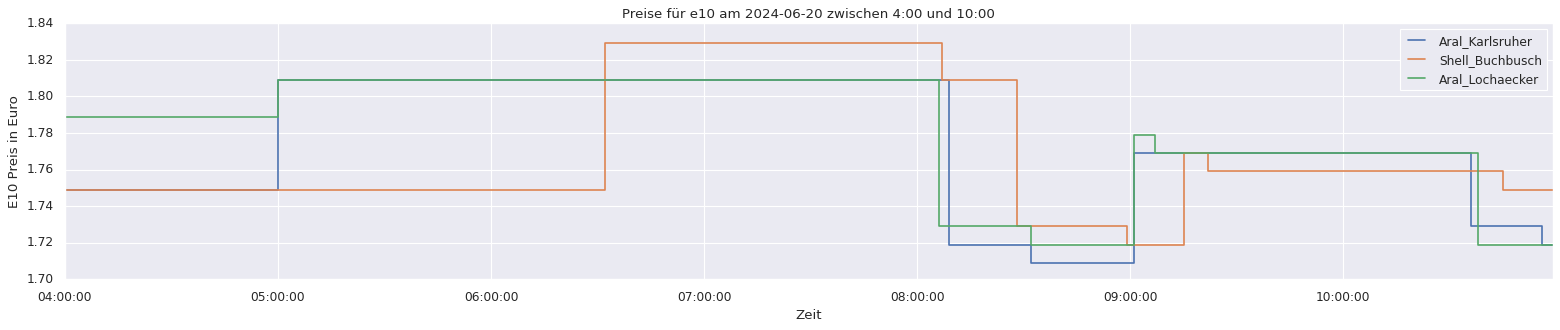

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konvertiere die 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen (kann aus dem DataFrame abgeleitet werden)
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Bestimme das Datum und den Zeitrahmen
selected_date = '2024-06-20'
start_hour = 4
end_hour = 10

# Filtere die Daten für das angegebene Datum und den Zeitrahmen
day_data = aral_shell_df[
    (aral_shell_df['date'].dt.date == pd.to_datetime(selected_date).date()) &
    (aral_shell_df['date'].dt.hour >= start_hour) &
    (aral_shell_df['date'].dt.hour <= end_hour)
]

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filtere die Daten für die aktuelle Tankstelle und den Tag
        df = day_data[day_data['station_uuid'] == station_id]

        # Erstelle den Plot
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Titel und Labels hinzufügen
    plt.title(f'Preise für {fuel} am {selected_date} zwischen {start_hour}:00 und {end_hour}:00')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Zeige den Plot
    plt.show()

### Interpretation der Durchschnittspreise während des Berufsverkehrs am Morgen (4:00 bis 10:00 Uhr) für die drei Kraftstoffarten am 20.06.2024

#### Dieselpreise

- **Aral_Karlsruher**
  - Der Dieselpreis startet bei 1,64 Euro um 4:00 Uhr und bleibt bis etwa 6:00 Uhr konstant. Danach steigt der Preis auf 1,68 Euro, bevor er um 7:00 Uhr auf 1,64 Euro zurückfällt. Gegen 9:00 Uhr sinkt der Preis weiter auf 1,62 Euro.
  - Diese Preisbewegung zeigt, dass Aral_Karlsruher den Preis anpasst, um die morgendliche Nachfrage zu nutzen, bevor er den Preis während der späteren Morgenstunden wieder senkt.

- **Shell_Buchbusch**
  - Der Dieselpreis startet bei 1,62 Euro und bleibt bis etwa 6:00 Uhr konstant. Dann steigt der Preis auf 1,74 Euro und bleibt dort bis etwa 7:30 Uhr, bevor er auf 1,62 Euro um 9:00 Uhr zurückfällt.
  - Shell_Buchbusch zeigt eine klare Preissteigerung in der Spitzenzeit des Berufsverkehrs, um die hohe Nachfrage zu nutzen, bevor der Preis gegen Ende des Berufsverkehrs wieder gesenkt wird.

- **Aral_Lochaecker**
  - Der Dieselpreis beginnt bei 1,68 Euro um 4:00 Uhr, steigt auf 1,72 Euro um 6:00 Uhr und zeigt dann eine hohe Volatilität, wobei er auf 1,60 Euro gegen 8:00 Uhr sinkt und schließlich um 10:00 Uhr wieder auf 1,62 Euro ansteigt.
  - Aral_Lochaecker zeigt die größte Preisvolatilität, was auf eine aggressive Preisstrategie hindeutet, um die Nachfrage zu Spitzenzeiten optimal zu nutzen.

#### E5-Preise

- **Aral_Karlsruher**
  - Der E5-Preis startet bei 1,82 Euro und bleibt bis etwa 6:00 Uhr konstant. Danach steigt der Preis auf 1,86 Euro und bleibt bis etwa 7:30 Uhr, bevor er auf 1,82 Euro um 9:00 Uhr zurückfällt.
  - Diese Preisbewegung deutet darauf hin, dass Aral_Karlsruher den Preis anpasst, um die morgendliche Nachfrage zu nutzen, bevor der Preis während der späteren Morgenstunden wieder gesenkt wird.

- **Shell_Buchbusch**
  - Der E5-Preis startet bei 1,80 Euro und bleibt bis etwa 6:00 Uhr konstant. Dann steigt der Preis auf 1,88 Euro und bleibt dort bis etwa 7:30 Uhr, bevor er auf 1,80 Euro um 9:00 Uhr zurückfällt.
  - Shell_Buchbusch zeigt eine deutliche Preissteigerung in der Spitzenzeit des Berufsverkehrs, um die hohe Nachfrage zu nutzen, bevor der Preis gegen Ende des Berufsverkehrs wieder gesenkt wird.

- **Aral_Lochaecker**
  - Der E5-Preis beginnt bei 1,84 Euro um 4:00 Uhr, steigt auf 1,88 Euro um 6:00 Uhr und zeigt dann eine hohe Volatilität, wobei er auf 1,76 Euro gegen 8:00 Uhr sinkt und schließlich um 10:00 Uhr wieder auf 1,78 Euro ansteigt.
  - Aral_Lochaecker zeigt die größte Preisvolatilität, was auf eine aggressive Preisstrategie hindeutet, um die Nachfrage zu Spitzenzeiten optimal zu nutzen.

#### E10-Preise

- **Aral_Karlsruher**
  - Der E10-Preis startet bei 1,76 Euro und bleibt bis etwa 6:00 Uhr konstant. Danach steigt der Preis auf 1,80 Euro und bleibt bis etwa 7:30 Uhr, bevor er auf 1,76 Euro um 9:00 Uhr zurückfällt.
  - Diese Preisbewegung zeigt, dass Aral_Karlsruher den Preis anpasst, um die morgendliche Nachfrage zu nutzen, bevor der Preis während der späteren Morgenstunden wieder gesenkt wird.

- **Shell_Buchbusch**
  - Der E10-Preis startet bei 1,74 Euro und bleibt bis etwa 6:00 Uhr konstant. Dann steigt der Preis auf 1,82 Euro und bleibt dort bis etwa 7:30 Uhr, bevor er auf 1,74 Euro um 9:00 Uhr zurückfällt.
  - Shell_Buchbusch zeigt eine deutliche Preissteigerung in der Spitzenzeit des Berufsverkehrs, um die hohe Nachfrage zu nutzen, bevor der Preis gegen Ende des Berufsverkehrs wieder gesenkt wird.

- **Aral_Lochaecker**
  - Der E10-Preis beginnt bei 1,78 Euro um 4:00 Uhr, steigt auf 1,82 Euro um 6:00 Uhr und zeigt dann eine hohe Volatilität, wobei er auf 1,72 Euro gegen 8:00 Uhr sinkt und schließlich um 10:00 Uhr wieder auf 1,74 Euro ansteigt.
  - Aral_Lochaecker zeigt die größte Preisvolatilität, was auf eine aggressive Preisstrategie hindeutet, um die Nachfrage zu Spitzenzeiten optimal zu nutzen.

### Gesamtvergleich und Wettbewerb

- **Aral_Karlsruher**: Zeigt eine moderate Preisvolatilität während des Berufsverkehrs am Morgen. Die Tankstelle passt die Preise dynamisch an, um die Nachfrage zu nutzen, während sie dennoch eine gewisse Stabilität beibehält.
  
- **Shell_Buchbusch**: Verfolgt eine deutliche Preissteigerungsstrategie während der morgendlichen Spitzenzeiten. Die Preise werden stark angehoben, um die hohe Nachfrage zu nutzen, und gegen Ende des Berufsverkehrs gesenkt, was auf eine aggressive, aber kurzzeitige Preisstrategie hindeutet.

- **Aral_Lochaecker**: Zeigt die höchste Preisvolatilität während des Berufsverkehrs am Morgen. Diese Tankstelle passt die Preise am aggressivsten an, was auf eine Strategie zur Maximierung der Margen während der Spitzenzeiten hinweist.

**Berufsverkehr Abend**

<ipython-input-54-5f6fa7b5505c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


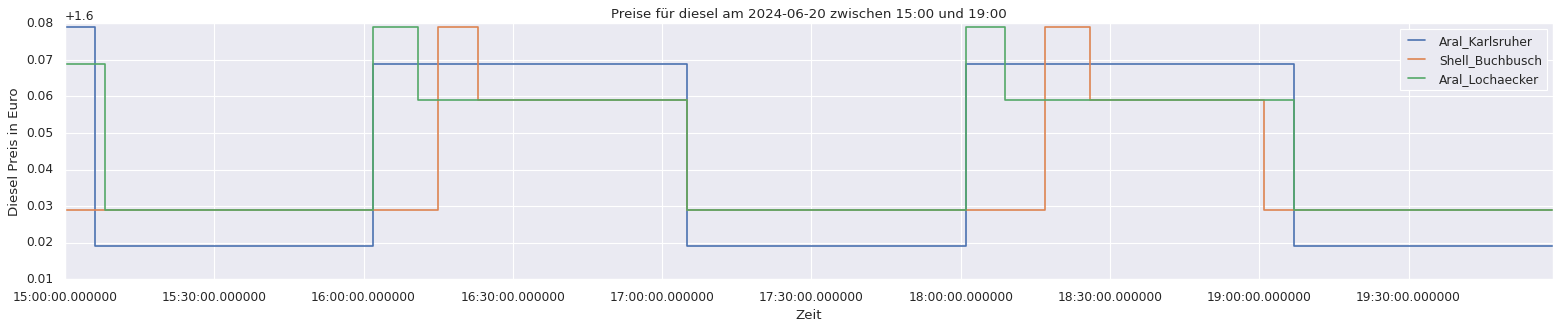

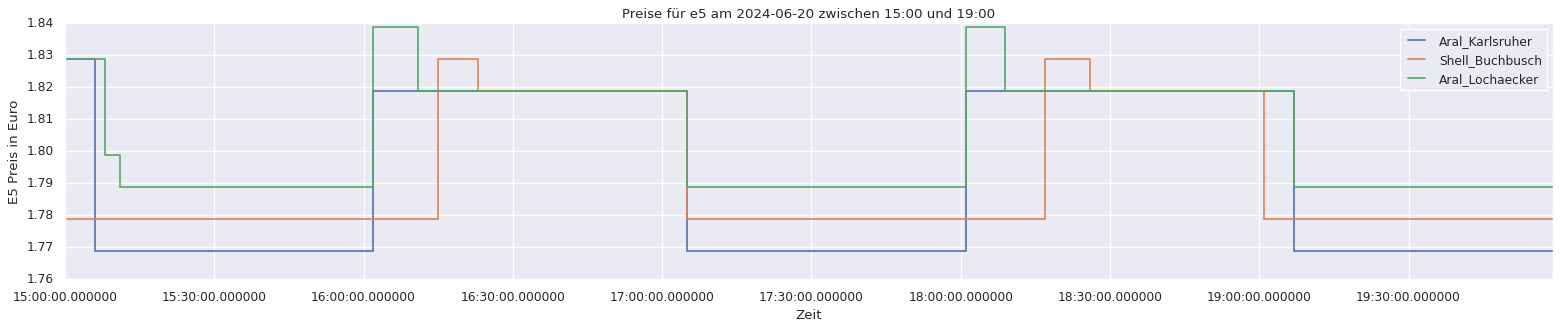

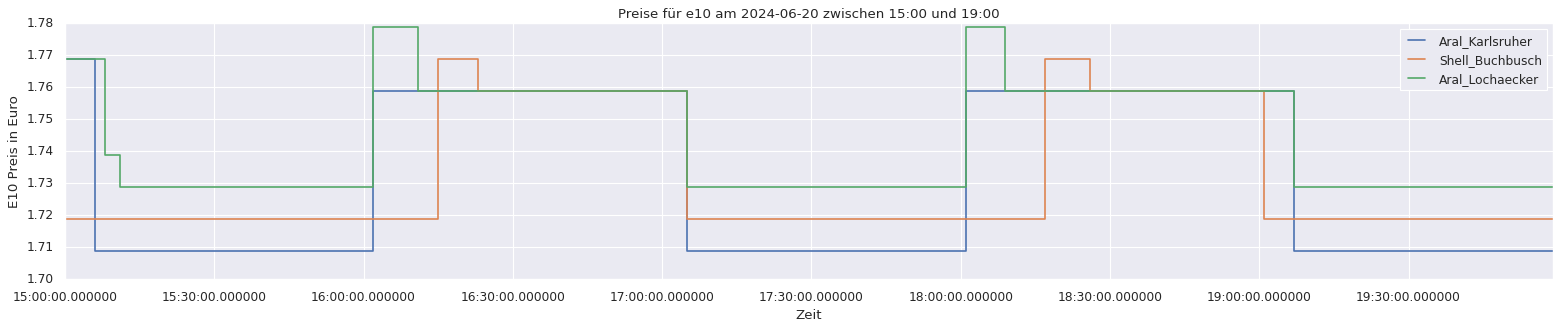

In [ ]:
# Konvertiere die 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# Style settings for plots
plt.style.use('classic')
sns.set()

# IDs der Tankstellen (kann aus dem DataFrame abgeleitet werden)
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Bestimme das Datum und den Zeitrahmen
selected_date = '2024-06-20'
start_hour = 15
end_hour = 19

# Filtere die Daten für das angegebene Datum und den Zeitrahmen
day_data = aral_shell_df[
    (aral_shell_df['date'].dt.date == pd.to_datetime(selected_date).date()) &
    (aral_shell_df['date'].dt.hour >= start_hour) &
    (aral_shell_df['date'].dt.hour <= end_hour)
]

# Loop durch alle Kraftstoffarten und IDs der Tankstellen
for fuel in fuel_types:
    plt.figure(figsize=(24, 4))

    for station_id in station_ids:
        # Filtere die Daten für die aktuelle Tankstelle und den Tag
        df = day_data[day_data['station_uuid'] == station_id]

        # Erstelle den Plot
        plt.step(df['date'], df[fuel], where='pre', label=station_id)

    # Titel und Labels hinzufügen
    plt.title(f'Preise für {fuel} am {selected_date} zwischen {start_hour}:00 und {end_hour}:00')
    plt.xlabel('Zeit')
    plt.ylabel(f'{fuel.capitalize()} Preis in Euro')
    plt.legend()

    # Zeige den Plot
    plt.show()

### Dieselpreise während des Abendberufsverkehrs

- **Aral Karlsruher:** Diese Tankstelle zeigt eine relativ stabile Preisstruktur während des Abendberufsverkehrs. Es gibt wenige Preisänderungen, und die Preise bewegen sich um die 1,66 bis 1,67 Euro pro Liter. Zwischen 16:00 und 17:30 Uhr bleiben die Preise konstant, gefolgt von leichten Schwankungen gegen 18:00 Uhr.
- **Shell Buchbusch:** Die Shell-Tankstelle zeigt ebenfalls eine stabile Preisstruktur, jedoch mit etwas mehr Schwankungen als Aral Karlsruher. Die Preise variieren zwischen 1,64 und 1,67 Euro pro Liter. Es gibt eine auffällige Preisänderung um 16:30 Uhr und eine weitere um 18:30 Uhr.
- **Aral Lochaecker:** Diese Tankstelle weist die meisten Preisänderungen auf, mit Preisen, die zwischen 1,64 und 1,67 Euro pro Liter schwanken. Es gibt mehrere Änderungen in kurzen Abständen, besonders um 16:00 Uhr und wieder gegen 18:00 Uhr.

### E5-Preise während des Abendberufsverkehrs

- **Aral Karlsruher:** Die Preisstruktur ist stabil, mit wenigen Änderungen während des Berufsverkehrs. Die Preise bewegen sich hauptsächlich um 1,82 bis 1,83 Euro pro Liter. Es gibt nur minimale Schwankungen.
- **Shell Buchbusch:** Die Preise an dieser Tankstelle sind etwas variabler, mit Schwankungen zwischen 1,81 und 1,83 Euro pro Liter. Bemerkenswerte Preisänderungen treten um 16:30 Uhr und erneut um 18:30 Uhr auf.
- **Aral Lochaecker:** Diese Tankstelle zeigt eine ähnliche Preisdynamik wie die anderen beiden, jedoch mit mehr Änderungen in kurzen Abständen. Die Preise bewegen sich zwischen 1,81 und 1,83 Euro pro Liter, mit mehreren Anpassungen, besonders um 16:00 Uhr und 18:00 Uhr.

### E10-Preise während des Abendberufsverkehrs

- **Aral Karlsruher:** Diese Tankstelle hat eine recht stabile Preisstruktur, mit wenigen Änderungen. Die Preise variieren zwischen 1,74 und 1,75 Euro pro Liter, mit kaum bemerkbaren Schwankungen.
- **Shell Buchbusch:** Die Preise sind stabil, aber es gibt leichte Schwankungen zwischen 1,72 und 1,75 Euro pro Liter. Bemerkenswerte Preisänderungen treten um 16:30 Uhr und 18:30 Uhr auf.
- **Aral Lochaecker:** Diese Tankstelle zeigt die meisten Preisänderungen während des Abendberufsverkehrs. Die Preise variieren zwischen 1,72 und 1,75 Euro pro Liter, mit mehreren Anpassungen um 16:00 Uhr und 18:00 Uhr.

### Zusammenfassung und Vergleich der Profile

**Aral Karlsruher:**
- Stabilste Preisstruktur während der Berufsverkehrszeiten.
- Geringe Anzahl an Preisänderungen.
- Geringe Schwankungen im Preisniveau für alle Kraftstoffarten.

**Shell Buchbusch:**
- Mehr Preisänderungen im Vergleich zu Aral Karlsruher, aber weniger als Aral Lochaecker.
- Moderate Schwankungen im Preisniveau, besonders bemerkbar um 16:30 und 18:30 Uhr.
- Ähnliche Preisstruktur für Diesel, E5 und E10.

**Aral Lochaecker:**
- Die meisten Preisänderungen und Schwankungen während der Berufsverkehrszeiten.
- Deutlich variableres Preisniveau, besonders in kurzen Zeitabständen.
- Anfällig für schnelle Preisänderungen um 16:00 und 18:00 Uhr.


# Deskriptive Statistiken für die zwei Wettbewerber und Aral_Lochaecker

**Durchschnitt und Standardabweichung der Preise sowie Durchschnitt der Preise nach Stunde und Wochentag**

<ipython-input-55-8004e5814f66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


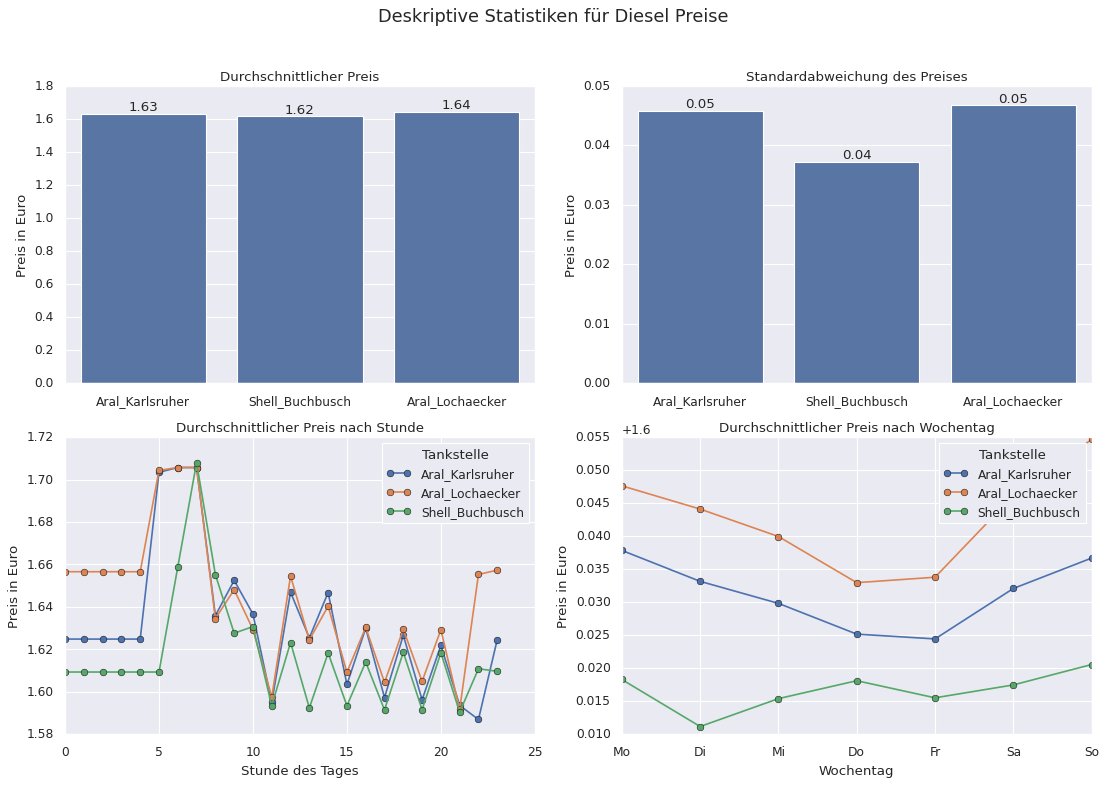

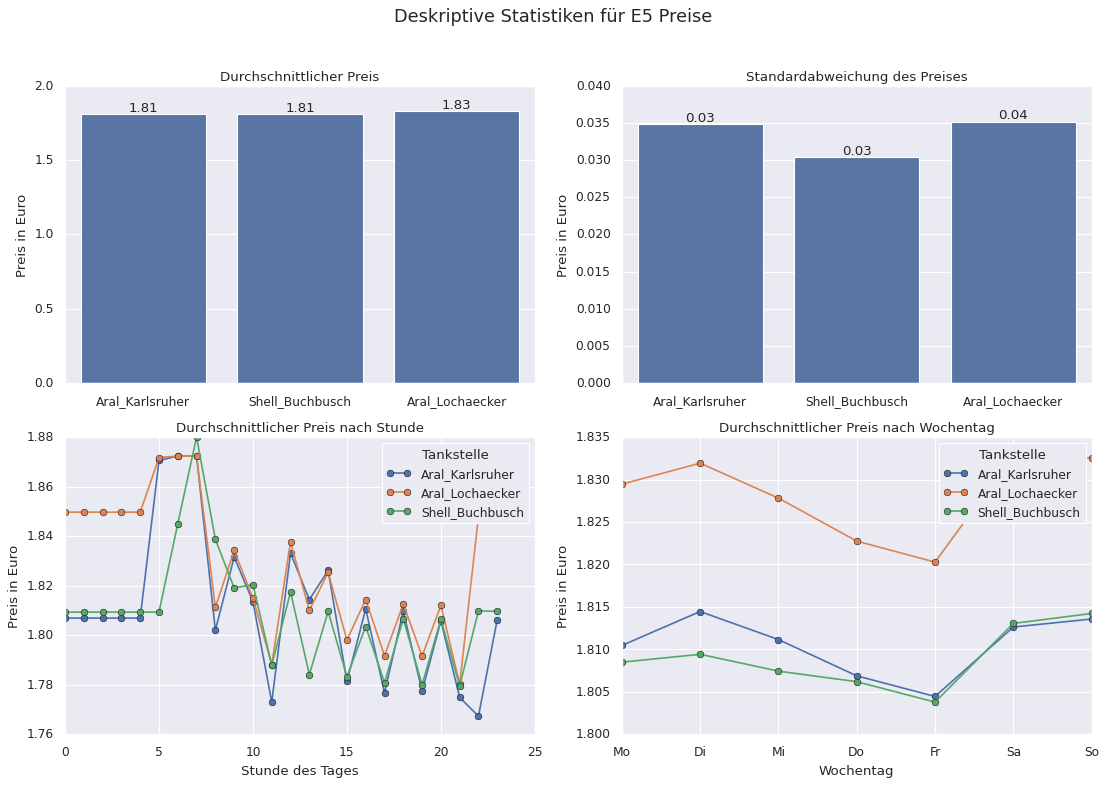

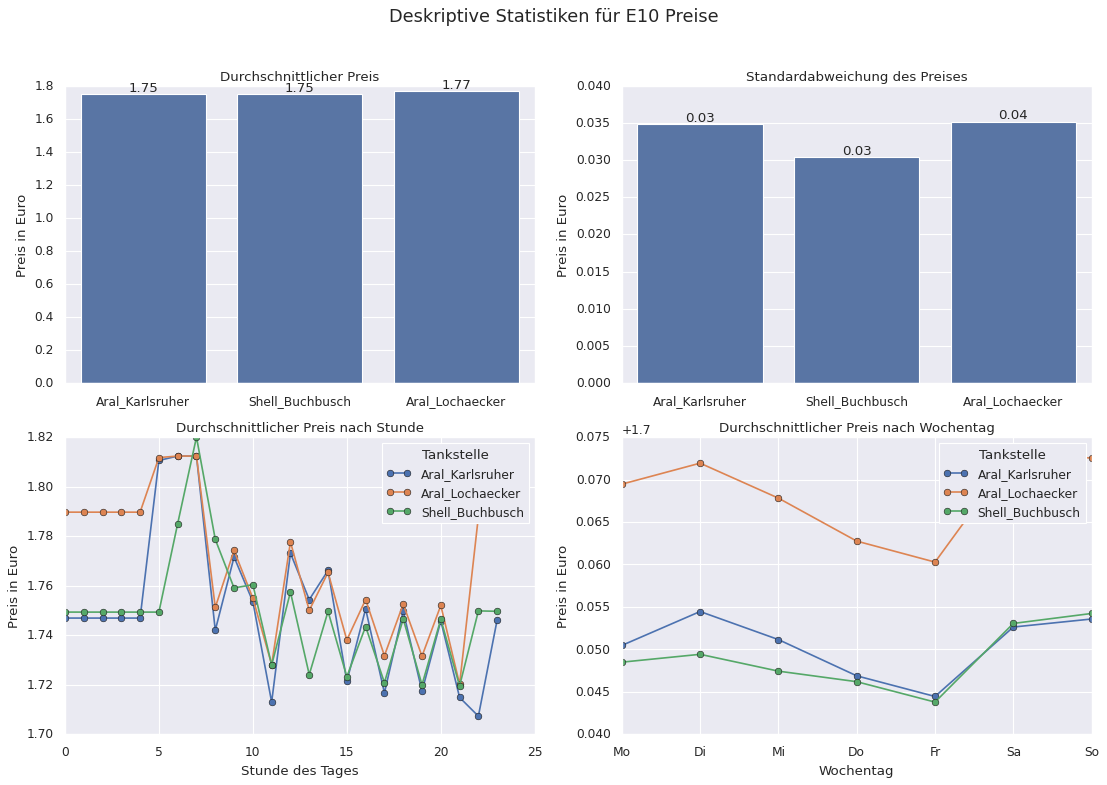

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konvertiere die 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# IDs der Tankstellen (kann aus dem DataFrame abgeleitet werden)
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_types = ['diesel', 'e5', 'e10']

# Funktion zum Berechnen und Visualisieren der deskriptiven Statistiken
def visualize_statistics(data, fuel):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Deskriptive Statistiken für {fuel.capitalize()} Preise', fontsize=16)

    # Durchschnitt und Standardabweichung
    means = []
    stds = []
    for station_id in station_ids:
        station_data = data[data['station_uuid'] == station_id]
        means.append(station_data[fuel].mean())
        stds.append(station_data[fuel].std())

    # Plot für durchschnittliche Preise
    sns.barplot(x=station_ids, y=means, ax=axes[0, 0])
    axes[0, 0].set_title('Durchschnittlicher Preis')
    axes[0, 0].set_ylabel('Preis in Euro')
    for i in range(len(station_ids)):
        axes[0, 0].text(i, means[i], f'{means[i]:.2f}', ha='center', va='bottom')

    # Plot für Standardabweichung
    sns.barplot(x=station_ids, y=stds, ax=axes[0, 1])
    axes[0, 1].set_title('Standardabweichung des Preises')
    axes[0, 1].set_ylabel('Preis in Euro')
    for i in range(len(station_ids)):
        axes[0, 1].text(i, stds[i], f'{stds[i]:.2f}', ha='center', va='bottom')

    # Durchschnitt nach Stunde
    hourly_means = data.groupby([data['station_uuid'], data['date'].dt.hour])[fuel].mean().unstack(0)
    hourly_means.plot(kind='line', ax=axes[1, 0], marker='o')
    axes[1, 0].set_title('Durchschnittlicher Preis nach Stunde')
    axes[1, 0].set_ylabel('Preis in Euro')
    axes[1, 0].set_xlabel('Stunde des Tages')
    axes[1, 0].legend(title='Tankstelle')

    # Durchschnitt nach Wochentag
    weekday_means = data.groupby([data['station_uuid'], data['date'].dt.weekday])[fuel].mean().unstack(0)
    weekday_means.plot(kind='line', ax=axes[1, 1], marker='o')
    axes[1, 1].set_title('Durchschnittlicher Preis nach Wochentag')
    axes[1, 1].set_ylabel('Preis in Euro')
    axes[1, 1].set_xlabel('Wochentag')
    axes[1, 1].set_xticks(range(7))
    axes[1, 1].set_xticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
    axes[1, 1].legend(title='Tankstelle')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Loop durch alle Kraftstoffarten und visualisiere die Statistiken
for fuel in fuel_types:
    visualize_statistics(aral_shell_df, fuel)


#Oben Links
### Beschreibung der Abbildungen

1. **Durchschnittlicher Dieselpreis**
   - **Aral_Karlsruher**: 1,63 Euro
   - **Shell_Buchbusch**: 1,62 Euro
   - **Aral_Lochaecker**: 1,64 Euro

2. **Durchschnittlicher E5-Preis**
   - **Aral_Karlsruher**: 1,81 Euro
   - **Shell_Buchbusch**: 1,81 Euro
   - **Aral_Lochaecker**: 1,83 Euro

3. **Durchschnittlicher E10-Preis**
   - **Aral_Karlsruher**: 1,75 Euro
   - **Shell_Buchbusch**: 1,75 Euro
   - **Aral_Lochaecker**: 1,77 Euro

### Interpretation

- **Aral_Lochaecker**
  - Aral_Lochaecker hat durchweg die höchsten durchschnittlichen Preise für alle Kraftstoffarten, was auf eine Premium-Positionierung oder weniger preissensible Kundschaft hindeutet.

- **Shell_Buchbusch**
  - Shell_Buchbusch hat den niedrigsten Dieselpreis und teilt sich die gleichen Preise für E5 und E10 mit Aral_Karlsruher, was auf eine preisbewusste Strategie hindeutet.

- **Aral_Karlsruher**
  - Aral_Karlsruher positioniert sich preislich zwischen Aral_Lochaecker und Shell_Buchbusch für Diesel und gleicht Shell_Buchbusch bei E5 und E10.

### Vergleich
- **Aral_Lochaecker** ist durchweg am teuersten für alle Kraftstoffarten, was auf eine Strategie abzielt, die entweder auf Standortvorteile oder eine weniger preissensible Kundschaft setzt.
- **Shell_Buchbusch** verfolgt eine aggressive Preispolitik bei Diesel und hält konkurrenzfähige Preise bei E5 und E10, um preissensible Kunden anzuziehen.
- **Aral_Karlsruher** bleibt im Mittelfeld für Dieselpreise und gleicht Shell_Buchbusch bei den Preisen für E5 und E10, was auf eine flexible Preisstrategie hindeutet, die sowohl preisbewusste als auch markentreue Kunden ansprechen soll.


#Oben Rechts
### Beschreibung der Abbildungen

1. **Standardabweichung der Dieselpreise**
   - **Aral_Karlsruher**: 0,05 Euro
   - **Shell_Buchbusch**: 0,04 Euro
   - **Aral_Lochaecker**: 0,05 Euro

2. **Standardabweichung der E5-Preise**
   - **Aral_Karlsruher**: 0,03 Euro
   - **Shell_Buchbusch**: 0,03 Euro
   - **Aral_Lochaecker**: 0,04 Euro

3. **Standardabweichung der E10-Preise**
   - **Aral_Karlsruher**: 0,03 Euro
   - **Shell_Buchbusch**: 0,03 Euro
   - **Aral_Lochaecker**: 0,04 Euro

### Interpretation

- **Aral_Lochaecker**
  - Aral_Lochaecker zeigt die größte Preisschwankung über alle Kraftstoffarten hinweg, was auf eine flexible und aggressive Preisstrategie hinweist.

- **Shell_Buchbusch**
  - Shell_Buchbusch hat die stabilsten Preise für alle Kraftstoffarten, was auf eine konservative und preisstabile Strategie hinweist.

- **Aral_Karlsruher**
  - Aral_Karlsruher zeigt höhere Schwankungen bei Dieselpreisen, aber stabilere Preise bei E5 und E10, was auf eine differenzierte Preisstrategie hinweist.

### Vergleich

- **Aral_Lochaecker**: Hat die höchsten Schwankungen bei allen Kraftstoffarten, was auf eine flexible Preisstrategie hinweist, die stark auf Marktveränderungen reagiert.
- **Shell_Buchbusch**: Verfolgt eine Strategie der Preisstabilität, mit den geringsten Schwankungen in allen Kraftstoffarten, was preisbewusste Kunden anspricht.
- **Aral_Karlsruher**: Zeigt eine Mischung aus hohen Schwankungen bei Diesel und stabileren Preisen bei E5 und E10, was auf eine flexible, aber differenzierte Preisstrategie hinweist.

#Unten Links
### Interpretation

- **Aral_Lochaecker**
  - **Diesel**: Höhere Preise in den frühen Morgenstunden (ca. 4 bis 7 Uhr), danach Schwankungen zwischen 1,62 und 1,66 Euro.
  - **E5**: Ähnliches Muster wie bei Diesel, mit Spitzen in den frühen Morgenstunden und späteren Schwankungen.
  - **E10**: Konsistente Preismuster mit den höchsten Preisen in den frühen Morgenstunden und Schwankungen im Tagesverlauf.

  - **Zusammenfassung**: Aral_Lochaecker zeigt höhere Preise in den frühen Morgenstunden für alle Kraftstoffarten, was auf eine Strategie hinweist, die die Morgenstunden zur Maximierung der Margen nutzt.

- **Shell_Buchbusch**
  - **Diesel**: Niedrigste Preise im Vergleich zu den anderen Tankstellen, mit geringen Schwankungen im Tagesverlauf.
  - **E5**: Ähnliche Preismuster wie bei Diesel, mit geringeren Schwankungen.
  - **E10**: Konsistente Preise mit geringeren Schwankungen im Vergleich zu den anderen beiden Tankstellen.

  - **Zusammenfassung**: Shell_Buchbusch hat die stabilsten und niedrigsten Preise, was auf eine konservative und preisstabile Strategie hinweist.

- **Aral_Karlsruher**
  - **Diesel**: Zeigt eine starke Preisspitze in den frühen Morgenstunden, danach schwankende Preise.
  - **E5**: Ähnliche Muster wie bei Diesel, mit einer deutlichen Preisspitze am Morgen und Schwankungen danach.
  - **E10**: Konsistente Muster mit Preisspitzen in den frühen Morgenstunden und Schwankungen im Tagesverlauf.

  - **Zusammenfassung**: Aral_Karlsruher zeigt eine flexible Preisstrategie mit deutlichen Preisspitzen in den frühen Morgenstunden und Schwankungen während des Tages.

### Vergleich

- **Aral_Lochaecker**: Setzt auf höhere Preise in den frühen Morgenstunden, um Margen zu maximieren, gefolgt von Preisvolatilität im Laufe des Tages.
- **Shell_Buchbusch**: Verfolgt eine Strategie der Preisstabilität und hat durchweg die niedrigsten Preise für alle Kraftstoffarten.
- **Aral_Karlsruher**: Ähnlich wie Aral_Lochaecker, aber mit etwas moderateren Schwankungen und Preisspitzen in den frühen Morgenstunden.


#Unten Rechts
### Interpretation

- **Aral_Lochaecker**
  - **Diesel**: Höchste Preise zu Wochenbeginn (Montag) mit einem stetigen Rückgang bis Donnerstag, leichter Anstieg am Freitag und dann wieder Rückgang.
  - **E5**: Höchste Preise zu Wochenbeginn, Rückgang bis Freitag, dann ein leichter Anstieg.
  - **E10**: Ähnliches Muster wie bei Diesel und E5, mit dem höchsten Preis am Montag und einem Rückgang bis Donnerstag, leichter Anstieg am Freitag.

  - **Zusammenfassung**: Aral_Lochaecker tendiert dazu, zu Wochenbeginn höhere Preise zu haben, die im Verlauf der Woche sinken, mit einem leichten Anstieg am Freitag.

- **Shell_Buchbusch**
  - **Diesel**: Niedrigste Preise im Vergleich zu den anderen Tankstellen, konstante Preisstruktur über die Woche hinweg.
  - **E5**: Stabiler Preisverlauf mit minimalen Schwankungen, insgesamt niedrigste Preise.
  - **E10**: Geringste Schwankungen im Wochenverlauf, konstant niedrige Preise.

  - **Zusammenfassung**: Shell_Buchbusch hat die stabilsten und niedrigsten Preise über die gesamte Woche hinweg, was auf eine konservative Preisstrategie hinweist.

- **Aral_Karlsruher**
  - **Diesel**: Höchste Preise am Montag, mit einem Rückgang im Verlauf der Woche und einem Anstieg am Wochenende.
  - **E5**: Ähnliche Preisstruktur wie bei Diesel, mit einem Rückgang in der Mitte der Woche und einem Anstieg am Wochenende.
  - **E10**: Konsistentes Muster mit den höchsten Preisen am Montag, Rückgang bis Freitag und dann ein Anstieg am Wochenende.

  - **Zusammenfassung**: Aral_Karlsruher zeigt einen flexiblen Preisverlauf mit höheren Preisen zu Beginn der Woche und Schwankungen im Verlauf der Woche.

### Vergleich

- **Aral_Lochaecker**: Setzt auf höhere Preise zu Wochenbeginn, gefolgt von einem Rückgang im Verlauf der Woche und einem leichten Anstieg am Freitag. Diese Strategie könnte auf eine höhere Nachfrage zu Beginn der Woche abzielen.
- **Shell_Buchbusch**: Verfolgt eine sehr stabile Preisstrategie mit den niedrigsten Preisen über die gesamte Woche hinweg, was preissensible Kunden ansprechen dürfte.
- **Aral_Karlsruher**: Zeigt eine Mischung aus hohen Preisen zu Beginn der Woche und Schwankungen im Verlauf der Woche, mit einem Anstieg am Wochenende. Diese Strategie könnte darauf abzielen, die Preise an die wöchentliche Nachfrage anzupassen.




**Durchschnittliche Anzahl der Preisänderungen nach Stunde und Wochentag**

<ipython-input-56-f94d52c8e8fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])


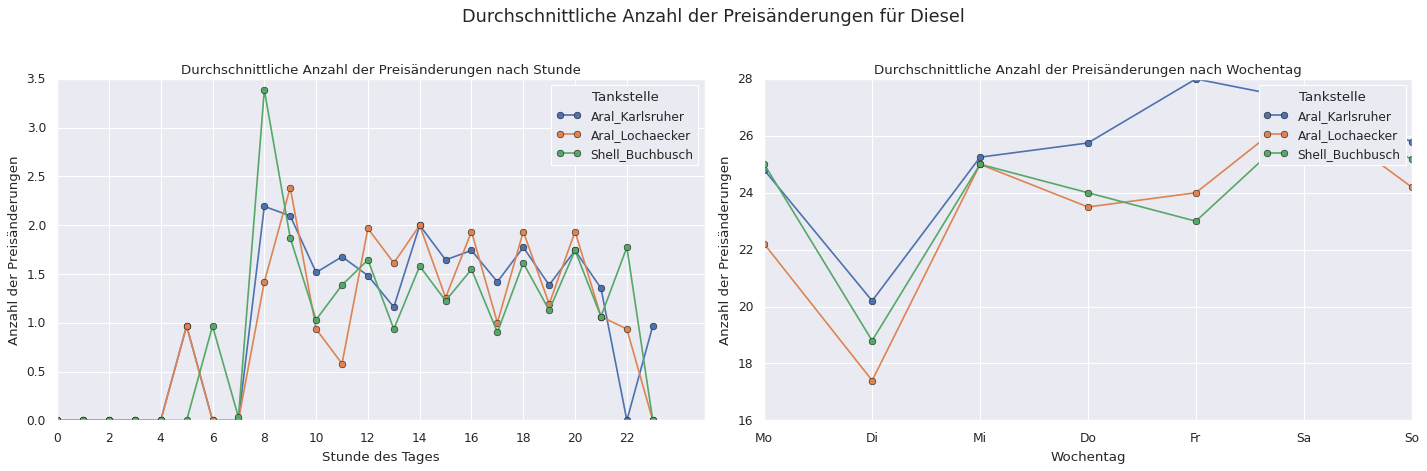

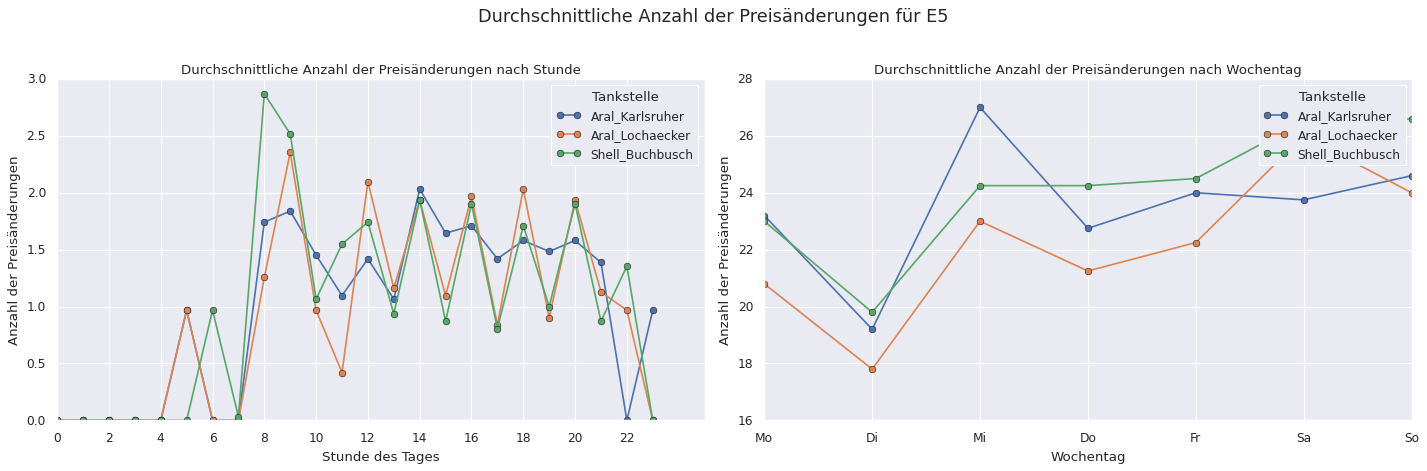

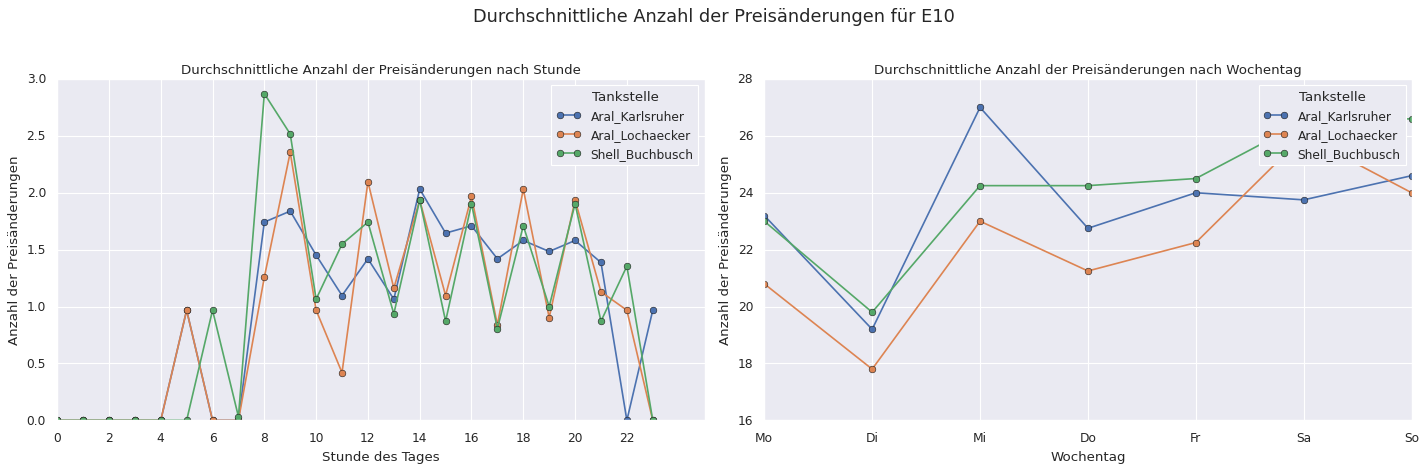

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konvertiere die 'date'-Spalte in das datetime-Format
aral_shell_df['date'] = pd.to_datetime(aral_shell_df['date'])

# IDs der Tankstellen (kann aus dem DataFrame abgeleitet werden)
station_ids = aral_shell_df['station_uuid'].unique()

# Kraftstoffarten
fuel_changes = ['dieselchange', 'e5change', 'e10change']
fuel_labels = ['Diesel', 'E5', 'E10']

# Berechnung der Anzahl der Tage im Datensatz
num_days = aral_shell_df['date'].dt.date.nunique()

# Berechnung der Anzahl der Vorkommen eines jeden Wochentages im Datensatz
unique_dates = aral_shell_df['date'].dt.date.unique()
weekday_counts = pd.Series([date.weekday() for date in unique_dates]).value_counts().sort_index()

# Funktion zum Berechnen und Visualisieren der durchschnittlichen Anzahl der Preisänderungen
def visualize_avg_price_changes(data, fuel_change_column, fuel_label):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'Durchschnittliche Anzahl der Preisänderungen für {fuel_label}', fontsize=16)

    # Berechnung der durchschnittlichen Anzahl der Preisänderungen nach Stunde
    hourly_changes = data.groupby([data['station_uuid'], data['date'].dt.hour])[fuel_change_column].sum().unstack(0)
    hourly_avg_changes = hourly_changes / num_days

    # Plot für durchschnittliche Anzahl der Preisänderungen nach Stunde
    hourly_avg_changes.plot(kind='line', ax=axes[0], marker='o')
    axes[0].set_title('Durchschnittliche Anzahl der Preisänderungen nach Stunde')
    axes[0].set_ylabel('Anzahl der Preisänderungen')
    axes[0].set_xlabel('Stunde des Tages')
    axes[0].set_xticks(range(0, 24, 2))  # Zeigt alle 2 Stunden auf der X-Achse an
    axes[0].legend(title='Tankstelle')

    # Berechnung der durchschnittlichen Anzahl der Preisänderungen nach Wochentag
    weekday_changes = data.groupby([data['station_uuid'], data['date'].dt.weekday])[fuel_change_column].sum().unstack(0)
    weekday_avg_changes = weekday_changes.divide(weekday_counts, axis=0)

    # Plot für durchschnittliche Anzahl der Preisänderungen nach Wochentag
    weekday_avg_changes.plot(kind='line', ax=axes[1], marker='o')
    axes[1].set_title('Durchschnittliche Anzahl der Preisänderungen nach Wochentag')
    axes[1].set_ylabel('Anzahl der Preisänderungen')
    axes[1].set_xlabel('Wochentag')
    axes[1].set_xticks(range(7))
    axes[1].set_xticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
    axes[1].legend(title='Tankstelle')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Loop durch alle Kraftstoffarten und visualisiere die Statistiken
for fuel_change, fuel_label in zip(fuel_changes, fuel_labels):
    visualize_avg_price_changes(aral_shell_df, fuel_change, fuel_label)


#Links
### Interpretation

- **Aral_Lochaecker**
  - **Diesel**: Häufige Preisänderungen früh morgens (ca. 7 bis 9 Uhr) und in den Abendstunden (18 bis 22 Uhr).
  - **E5**: Ähnliches Muster wie bei Diesel, mit häufigen Preisänderungen früh morgens und abends.
  - **E10**: Höchste Anzahl der Preisänderungen früh morgens (ca. 7 bis 9 Uhr), danach weniger häufige Änderungen.
  - **Zusammenfassung**: Aral_Lochaecker zeigt häufige Preisänderungen in den frühen Morgenstunden und in den Abendstunden, was auf eine dynamische Anpassung der Preise an die Nachfrage hinweist.

- **Shell_Buchbusch**
  - **Diesel**: Weniger häufige Preisänderungen im Vergleich zu den anderen Tankstellen, mit einem Spitzenwert früh morgens.
  - **E5**: Ähnliches Muster, mit weniger häufigen Preisänderungen und einem Spitzenwert früh morgens.
  - **E10**: Weniger häufige Preisänderungen, mit einer Spitze früh morgens.
  - **Zusammenfassung**: Shell_Buchbusch hat die stabilsten Preise mit weniger häufigen Änderungen, was auf eine konservative Preisstrategie hinweist.

- **Aral_Karlsruher**
  - **Diesel**: Häufige Preisänderungen früh morgens und kontinuierliche Änderungen im Laufe des Tages.
  - **E5**: Ähnliches Muster wie bei Diesel, mit häufigen Änderungen früh morgens und kontinuierlichen Änderungen im Tagesverlauf.
  - **E10**: Häufige Änderungen früh morgens und kontinuierliche Änderungen im Laufe des Tages.
  - **Zusammenfassung**: Aral_Karlsruher zeigt eine hohe Frequenz von Preisänderungen, besonders früh morgens und kontinuierlich über den Tag verteilt, was auf eine flexible Preisstrategie hinweist.

### Vergleich

- **Aral_Lochaecker**: Hat häufige Preisänderungen in den frühen Morgenstunden und abends für alle Kraftstoffarten, was auf eine flexible Preisstrategie hinweist, die auf Nachfrageschwankungen reagiert.
- **Shell_Buchbusch**: Hat die geringste Anzahl an Preisänderungen und zeigt die stabilsten Preise, was auf eine konservative und stabile Preisstrategie hinweist.
- **Aral_Karlsruher**: Zeigt häufige Preisänderungen, besonders in den frühen Morgenstunden, und kontinuierliche Änderungen im Tagesverlauf, was auf eine dynamische und flexible Preisstrategie hinweist.


#Rechts
### Interpretation

- **Aral_Lochaecker**
  - **Diesel**: Die Anzahl der Preisänderungen ist am Dienstag am niedrigsten und erreicht ihren Höhepunkt am Montag und Mittwoch.
  - **E5**: Ähnliches Muster wie bei Diesel, mit einem Tiefpunkt am Dienstag und einem Höhepunkt am Mittwoch.
  - **E10**: Die Anzahl der Preisänderungen ist am Dienstag am niedrigsten und steigt im Verlauf der Woche an.
  - **Zusammenfassung**: Aral_Lochaecker zeigt die meisten Preisänderungen zu Beginn und in der Mitte der Woche, mit einem Tiefpunkt am Dienstag, was auf eine Strategie hindeutet, die sich auf Wochenanfang und -mitte konzentriert.

- **Shell_Buchbusch**
  - **Diesel**: Die Anzahl der Preisänderungen ist über die Woche relativ konstant, mit einem leichten Anstieg am Wochenende.
  - **E5**: Konstante Anzahl der Preisänderungen über die Woche, mit einem leichten Anstieg am Wochenende.
  - **E10**: Weniger Schwankungen in der Anzahl der Preisänderungen, ebenfalls konstant über die Woche.
  - **Zusammenfassung**: Shell_Buchbusch hat die stabilste Anzahl von Preisänderungen über die Woche hinweg, was auf eine gleichmäßige Preisstrategie hinweist.

- **Aral_Karlsruher**
  - **Diesel**: Die Anzahl der Preisänderungen erreicht ihren Höhepunkt am Mittwoch und ist am Dienstag am niedrigsten.
  - **E5**: Ähnliches Muster wie bei Diesel, mit einem Höhepunkt am Mittwoch und einem Tiefpunkt am Dienstag.
  - **E10**: Die Anzahl der Preisänderungen ist am Dienstag am niedrigsten und steigt bis zum Wochenende an.
  - **Zusammenfassung**: Aral_Karlsruher zeigt die meisten Preisänderungen in der Mitte der Woche, mit einem Tiefpunkt am Dienstag, was auf eine flexible Preisstrategie hinweist, die auf Wochenmitte abzielt.

### Vergleich

- **Aral_Lochaecker**: Zeigt die meisten Preisänderungen zu Wochenbeginn und in der Mitte der Woche, was auf eine Strategie hindeutet, die sich auf diese Tage konzentriert.
- **Shell_Buchbusch**: Hat die stabilste Anzahl von Preisänderungen über die Woche hinweg, was auf eine gleichmäßige und konservative Preisstrategie hinweist.
- **Aral_Karlsruher**: Zeigt die meisten Preisänderungen in der Mitte der Woche, was auf eine flexible Preisstrategie hinweist, die auf die Wochenmitte abzielt.



# Gesaminterpretation:


### Gesamtprofil der Tankstellen

#### Aral_Lochaecker

- **Preisniveau und -volatilität**: Aral_Lochaecker weist durchweg die höchsten Durchschnittspreise für alle Kraftstoffarten (Diesel, E5 und E10) auf. Diese hohen Preise sind mit einer hohen Standardabweichung verbunden, was auf eine aggressive und flexible Preisstrategie hinweist, die stark auf Marktveränderungen reagiert.

- **Preisverlauf nach Stunde**: Die Preise für alle Kraftstoffarten erreichen in den frühen Morgenstunden ihren Höhepunkt (zwischen 4 und 7 Uhr) und flachen dann ab. Diese Strategie könnte darauf abzielen, die Nachfrage zu diesen Spitzenzeiten optimal auszunutzen. Die Preisschwankungen im Laufe des Tages zeigen, dass Aral_Lochaecker dynamisch auf kurzfristige Marktveränderungen reagiert.

- **Preisverlauf nach Wochentag**: Die höchsten Preise sind zu Wochenbeginn (Montag) zu beobachten, mit einem kontinuierlichen Rückgang bis Donnerstag und einem leichten Anstieg am Freitag. Diese Preisstruktur deutet darauf hin, dass Aral_Lochaecker versucht, die höhere Nachfrage zu Wochenbeginn zu nutzen und am Ende der Woche wieder anzuziehen, möglicherweise um Wochenendverkehr zu bedienen.

- **Anzahl der Preisänderungen nach Stunde**: Aral_Lochaecker zeigt die höchste Anzahl von Preisänderungen in den frühen Morgenstunden und in den Abendstunden, was auf eine hochdynamische Preisstrategie hinweist, die darauf abzielt, Preisvorteile in Zeiten hoher Nachfrage zu maximieren.

- **Anzahl der Preisänderungen nach Wochentag**: Die meisten Preisänderungen erfolgen zu Wochenbeginn und in der Mitte der Woche, insbesondere am Montag und Mittwoch. Dies könnte darauf hindeuten, dass Aral_Lochaecker seine Preise zu Beginn und in der Mitte der Woche intensiver anpasst, um auf Marktveränderungen und Konkurrenzaktivitäten zu reagieren.

**Fazit**: Aral_Lochaecker setzt auf hohe Preise und eine hohe Preisvolatilität, um seine Margen zu maximieren. Die dynamischen Preisänderungen sowohl im Tagesverlauf als auch im Wochenverlauf deuten auf eine flexible und aggressive Preisstrategie hin, die versucht, sowohl die Nachfrage zu Spitzenzeiten als auch die wöchentliche Nachfrage optimal auszunutzen.

#### Shell_Buchbusch

- **Preisniveau und -volatilität**: Shell_Buchbusch hat durchweg die niedrigsten Durchschnittspreise und die geringste Preisvolatilität für alle Kraftstoffarten. Diese stabile Preisstrategie deutet darauf hin, dass Shell_Buchbusch preissensible Kunden ansprechen möchte und eine konservative Preisstrategie verfolgt.

- **Preisverlauf nach Stunde**: Die Preise bei Shell_Buchbusch sind im Vergleich zu den anderen Tankstellen stabiler, mit geringeren Schwankungen im Tagesverlauf. Die Preise erreichen früh morgens ihren Höhepunkt, flachen jedoch schnell ab und bleiben über den Tag hinweg stabil.

- **Preisverlauf nach Wochentag**: Shell_Buchbusch zeigt eine gleichmäßige Preisstruktur über die Woche hinweg, mit nur geringen Schwankungen. Diese Stabilität könnte darauf abzielen, eine treue Kundschaft zu gewinnen, die Wert auf konstante Preise legt.

- **Anzahl der Preisänderungen nach Stunde**: Shell_Buchbusch zeigt die geringste Anzahl an Preisänderungen, insbesondere in den frühen Morgenstunden. Diese geringe Volatilität deutet auf eine konservative Preisstrategie hin, die darauf abzielt, Preisstabilität zu gewährleisten.

- **Anzahl der Preisänderungen nach Wochentag**: Die Anzahl der Preisänderungen bleibt über die Woche hinweg relativ konstant, mit einem leichten Anstieg am Wochenende. Dies zeigt, dass Shell_Buchbusch eine stabile und vorhersehbare Preisstrategie verfolgt.

**Fazit**: Shell_Buchbusch setzt auf niedrige Preise und Preisstabilität, um preissensible Kunden anzuziehen. Die geringe Anzahl von Preisänderungen sowohl im Tagesverlauf als auch im Wochenverlauf deutet auf eine konservative Preisstrategie hin, die darauf abzielt, Kunden durch konstante und vorhersehbare Preise zu binden.

#### Aral_Karlsruher

- **Preisniveau und -volatilität**: Aral_Karlsruher liegt preislich zwischen Aral_Lochaecker und Shell_Buchbusch, zeigt jedoch eine mittlere Preisvolatilität. Diese moderate Preisstrategie deutet darauf hin, dass Aral_Karlsruher versucht, sowohl preisbewusste als auch markentreue Kunden anzusprechen.

- **Preisverlauf nach Stunde**: Die Preise bei Aral_Karlsruher erreichen früh morgens ihren Höhepunkt und zeigen dann Schwankungen im Laufe des Tages. Diese Strategie könnte darauf abzielen, die Nachfrage in den frühen Morgenstunden zu maximieren und gleichzeitig flexibel auf kurzfristige Marktveränderungen zu reagieren.

- **Preisverlauf nach Wochentag**: Aral_Karlsruher zeigt einen flexiblen Preisverlauf, mit den höchsten Preisen zu Wochenbeginn (Montag) und einem kontinuierlichen Rückgang bis Donnerstag, bevor die Preise am Wochenende wieder ansteigen. Diese Struktur deutet auf eine flexible Preisstrategie hin, die sowohl die Nachfrage zu Wochenbeginn als auch am Wochenende optimal ausnutzen möchte.

- **Anzahl der Preisänderungen nach Stunde**: Aral_Karlsruher zeigt eine hohe Anzahl von Preisänderungen, insbesondere früh morgens und kontinuierlich im Laufe des Tages. Diese hohe Frequenz deutet auf eine flexible Preisstrategie hin, die versucht, Preisvorteile in Zeiten hoher Nachfrage zu maximieren.

- **Anzahl der Preisänderungen nach Wochentag**: Die Anzahl der Preisänderungen erreicht ihren Höhepunkt am Mittwoch und ist am Dienstag am niedrigsten. Dies könnte darauf hinweisen, dass Aral_Karlsruher seine Preise in der Mitte der Woche intensiver anpasst, um auf Marktveränderungen und Konkurrenzaktivitäten zu reagieren.

**Fazit**: Aral_Karlsruher setzt auf eine moderate Preisstrategie mit mittlerer Volatilität, um sowohl preisbewusste als auch markentreue Kunden anzusprechen. Die dynamischen Preisänderungen sowohl im Tagesverlauf als auch im Wochenverlauf deuten auf eine flexible Preisstrategie hin, die versucht, sowohl die Nachfrage zu Spitzenzeiten als auch die wöchentliche Nachfrage optimal auszunutzen.

### Wettbewerb und Gesamtvergleich

- **Preisstrategie**: Aral_Lochaecker setzt auf hohe Preise und hohe Volatilität, um Margen zu maximieren, während Shell_Buchbusch auf niedrige Preise und Preisstabilität setzt, um preissensible Kunden anzuziehen. Aral_Karlsruher liegt preislich und in der Volatilität zwischen den beiden und versucht, ein breites Kundenspektrum anzusprechen.

- **Preisänderungen**: Aral_Lochaecker und Aral_Karlsruher zeigen häufige Preisänderungen, besonders in den frühen Morgenstunden und zu Wochenbeginn bzw. in der Mitte der Woche, während Shell_Buchbusch eine geringe Anzahl von Preisänderungen aufweist und somit eine stabile Preisstrategie verfolgt.

- **Nachfrageanpassung**: Aral_Lochaecker und Aral_Karlsruher passen ihre Preise dynamisch an, um auf Nachfrageänderungen zu reagieren, insbesondere zu Spitzenzeiten und während der Woche. Shell_Buchbusch hingegen hält seine Preise stabil, um eine treue Kundschaft zu gewinnen, die Wert auf konstante Preise legt.

Insgesamt zeigt sich, dass Aral_Lochaecker und Aral_Karlsruher auf flexible und dynamische Preisstrategien setzen, um Margen zu maximieren und auf kurzfristige Marktveränderungen zu reagieren, während Shell_Buchbusch auf Preisstabilität und niedrige Preise setzt, um preissensible Kunden langfristig zu binden. Diese unterschiedlichen Strategien spiegeln die verschiedenen Ansätze wider, wie jede Tankstelle versucht, ihre jeweilige Marktposition zu stärken und ihre Kundenbasis zu erweitern.

# Data cleansing and preprocessing für R

**Filtern nach Tankstellen in Pforzheim:**

In [ ]:
# Filtern des Datensatzes nach den IDs in ids_pf
data = raw_data[raw_data['station_uuid'].isin(ids_pf)]

In [ ]:
data.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
881,2024-05-25 23:47:41+00:00,7a8d7a4a-a898-48c1-9420-f4a843d3d32e,1.519,1.739,1.679,1,1,1
1552,2024-05-26 02:59:18+00:00,a839b4f0-ec0d-474a-a839-4ada95a6ca8a,1.609,1.809,1.749,1,1,1
2326,2024-05-26 03:02:21+00:00,bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7,1.689,1.889,1.829,1,1,1
2865,2024-05-26 03:02:21+00:00,4153a547-046a-410c-a575-968f21f1ce66,1.689,1.889,1.829,1,1,1
2866,2024-05-26 03:02:21+00:00,d6e30bca-f474-4e02-aef2-56bd5c2545d9,1.689,1.889,1.829,1,1,1


**Umwandlung des Datums zur Vorbereitung der Umcodierung des Datensatzes:**
* Datumsspalte in Datumsformat umwandeln
* Zeitzone anpassen (die bisherige Zeitzone war UTC)
* Zeitzone entfernen (da alle untersuchten in derselben Zeitzone sind)
* Datum als Index setzen (erleichtert den Zugriff und somit die geplante Umwandlung)
* Index auf nächste volle Minute runden (um die Daten zu vereinheitlichen)



In [ ]:
# Step 1: Parse the 'date' column to datetime, assuming it's already timezone-aware
data['date'] = pd.to_datetime(data['date'])

# Convert to 'Europe/Berlin' timezone and then remove the timezone information
data['date'] = data['date'].dt.tz_convert('Europe/Berlin').dt.tz_localize(None)

data.set_index('date', inplace=True)

data.index = data.index.round('T')  # 'T' represents minute frequency


<ipython-input-59-33c01f873e6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-59-33c01f873e6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['date'].dt.tz_convert('Europe/Berlin').dt.tz_localize(None)


**Erstellung eines neuen Dataframes für die umgewandelten Daten:**
* Das neue Dataframe enthält einen Datums- und Zeitindex für jede Minute innerhalb des Untersuchunszeitraums
* Dieses Vorgehen ermöglicht konsistente Analysen

In [ ]:
# Step 2: Create a new DataFrame with a datetime index for every minute
start_date = data.index.min()
end_date = data.index.max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='T')  # 'T' for minute frequency
df = pd.DataFrame(index=all_dates)

**Füllung des neuen Dataframes mit Daten:**
* In temporären Dataframes werden die Daten aus dem ursprünglichen Dateframe übernommen (also nur immer wenn sich der Preis geändert hat): Dabei gibt es ein temporäres Dateframe für jede Kombination aus Tankstelle und Kraftstoffart. Die Kombination wird durch den neuen Spaltentitel reflektiert, sodass die Daten im Nachhinein gut fusioniert werden können.
* Es werden Duplikate im Index des temporären Dataframes gelöscht, um sicherzustellen, dass jeder Zeitpunkt einzigarti ist.
* Die temporären Dataframes werden neu indiziert, um mit dem Index des gewünschten Dataframes df übereinzustimmen. Fehlende Werte werden "vorwärts gefüllt", d.h. der letzte bekannte Preis wird übernommen bei NA-Werten.
* Die Dataframes werden mit dem gewünschten Dataframe fusioniert

In [ ]:
# Step 3: Expand dataset for each station and fuel type
# Create columns for each station and fuel type
for station in data['station_uuid'].unique():
    for fuel_type in ['diesel', 'e5', 'e10']:
        # Create a temporary DataFrame for each station and fuel type
        temp_data = data[(data['station_uuid'] == station) & (data[f"{fuel_type}change"] == 1)]
        temp_data = temp_data[[fuel_type]].rename(columns={fuel_type: f"{station}_{fuel_type}"})

        # Ensure there's no duplicate index before reindexing
        temp_data = temp_data[~temp_data.index.duplicated(keep='first')]

        # Reindex the temp_data to match 'df', forward filling the missing values
        temp_data_reindexed = temp_data.reindex(df.index, method='ffill')

        # Join the reindexed data with 'df'
        df = df.join(temp_data_reindexed, how='left')

**Auffüllen der Preise:**
Dieser Code füllt fehlende Preisdaten im DataFrame df vorwärts auf.

Begründung:
Nachdem die temporären Dataframes mit dem gewünschten Dataframe zusammengeführt wurden, können weiterhin fehlende Werte auftreten. Dies liegt daran, dass nicht alle Tankstellen zu jedem Zeitpunkt Preisdaten für jeden Kraftstofftyp haben. Die Zusammenführung fügt neue Spalten zu df hinzu, aber für Zeiten, zu denen keine Preisdaten für eine bestimmte Tankstelle vorhanden waren, bleiben die Werte in diesen neuen Spalten leer.

In [ ]:
# Step 4: Forward fill the prices
df.ffill(inplace=True)

In [ ]:
df.head()

,7a8d7a4a-a898-48c1-9420-f4a843d3d32e_diesel,7a8d7a4a-a898-48c1-9420-f4a843d3d32e_e5,7a8d7a4a-a898-48c1-9420-f4a843d3d32e_e10,a839b4f0-ec0d-474a-a839-4ada95a6ca8a_diesel,a839b4f0-ec0d-474a-a839-4ada95a6ca8a_e5,a839b4f0-ec0d-474a-a839-4ada95a6ca8a_e10,bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7_diesel,bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7_e5,bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7_e10,4153a547-046a-410c-a575-968f21f1ce66_diesel,...,fbc4af15-1e1d-46ba-9a44-80c47900f3a5_e10,0be32f00-8ff4-45bf-bb4c-1588d6e03aa1_diesel,0be32f00-8ff4-45bf-bb4c-1588d6e03aa1_e5,0be32f00-8ff4-45bf-bb4c-1588d6e03aa1_e10,615f2d73-5214-47f2-8691-e4a8134380bb_diesel,615f2d73-5214-47f2-8691-e4a8134380bb_e5,615f2d73-5214-47f2-8691-e4a8134380bb_e10,3fe8dc63-1663-430f-bcc3-5bdbf281d3af_diesel,3fe8dc63-1663-430f-bcc3-5bdbf281d3af_e5,3fe8dc63-1663-430f-bcc3-5bdbf281d3af_e10
2024-05-26 01:48:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-26 01:49:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-26 01:50:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-26 01:51:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-26 01:52:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Datum als Spalte speichern um Datentransfer zu R zu vereinfachen:**

In [ ]:
df.reset_index(inplace=True, drop=False)  # 'drop=False' ensures the index is added as a column, not discarded

In [ ]:
# Assuming you've already converted the index to a column using reset_index
df = df.rename(columns={'index': 'date'})

**Aus dem Datum die Stunde, den wochentag und die Minute extrahieren:**

In [ ]:
# Extrahierung der Stunde, Wochentag und Minute aus der konvertierten 'date'-Spalte
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.weekday
df['minute'] = df['date'].dt.minute

**Spalten umbenennen damit sie besser lesbar sind:**

In [ ]:
station_names = {
    "0be32f00-8ff4-45bf-bb4c-1588d6e03aa1": "Tankcenter_Wurmberger",
    "0dc6786a-38e4-4576-8848-335975dea87b": "Aral_Armsel",
    "3fe8dc63-1663-430f-bcc3-5bdbf281d3af": "BFT_Haupt",
    "4153a547-046a-410c-a575-968f21f1ce66": "Aral_Karlsruher",
    "615f2d73-5214-47f2-8691-e4a8134380bb": "Access_Calwer",
    "6657358a-cf8c-4d8a-b4ec-a835271041ac": "ENI_Karlsruher",
    "71ee41a5-8e67-4c50-85ab-37b95f1ec76e": "Shell_Zerrenner",
    "7a8d7a4a-a898-48c1-9420-f4a843d3d32e": "SB_Eutinger",
    "85d87996-9667-4563-be19-7dd758a9a4a0": "Esso_KaiserFriedrich",
    "94fb812e-dae2-4d1e-c4c3-d7837b468dab": "TP_Braetzingen",
    "99f5fdc2-80d8-4c38-aa04-6295d0d78f96": "Esso_Calwer",
    "a839b4f0-ec0d-474a-a839-4ada95a6ca8a": "ENI_Hirsauer",
    "b0e03550-8c80-4917-92e7-db40e975d9f2": "Shell_Buchbusch",
    "d6e30bca-f474-4e02-aef2-56bd5c2545d9": "Aral_KaiserFriedrich",
    "fbc4af15-1e1d-46ba-9a44-80c47900f3a5": "Total_Breslauer",
    "22375adc-ed7e-423b-8191-2cd266f6bcd6": "MastOehlert_Blaecher",
    "35d5f441-d930-4993-adf4-ee1abdf14000": "Shell_Wilferdinger",
    "51d4b626-a095-1aa0-e100-80009459e03a": "JET_Karlsruher",
    "51d4b6b4-a095-1aa0-e100-80009459e03a": "JET_Luisen",
    "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7": "Aral_Lochaecker"
}

# Function to apply the mapping to column names
def rename_columns(column_name):
    for uuid in station_names.keys():
        if uuid in column_name:
            # Replace UUID with a placeholder or a specific name if provided
            new_name = station_names[uuid]
            return column_name.replace(uuid, new_name if new_name else "StationNamePlaceholder")
    return column_name

# Rename the columns based on the mapping
df.columns = [rename_columns(col) for col in df.columns]

In [ ]:
df.head(10000)

,date,SB_Eutinger_diesel,SB_Eutinger_e5,SB_Eutinger_e10,ENI_Hirsauer_diesel,ENI_Hirsauer_e5,ENI_Hirsauer_e10,Aral_Lochaecker_diesel,Aral_Lochaecker_e5,Aral_Lochaecker_e10,...,Tankcenter_Wurmberger_e10,Access_Calwer_diesel,Access_Calwer_e5,Access_Calwer_e10,BFT_Haupt_diesel,BFT_Haupt_e5,BFT_Haupt_e10,hour,weekday,minute
0,2024-05-26 01:48:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,48
1,2024-05-26 01:49:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,49
2,2024-05-26 01:50:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,50
3,2024-05-26 01:51:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,51
4,2024-05-26 01:52:00,1.519,1.739,1.679,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-06-02 00:23:00,1.559,1.759,1.699,1.619,1.799,1.739,1.639,1.859,1.799,...,1.679,1.599,1.769,1.709,1.499,1.699,1.639,0,6,23
9996,2024-06-02 00:24:00,1.559,1.759,1.699,1.619,1.799,1.739,1.639,1.859,1.799,...,1.679,1.599,1.769,1.709,1.499,1.699,1.639,0,6,24
9997,2024-06-02 00:25:00,1.559,1.759,1.699,1.619,1.799,1.739,1.639,1.859,1.799,...,1.679,1.599,1.769,1.709,1.499,1.699,1.639,0,6,25
9998,2024-06-02 00:26:00,1.559,1.759,1.699,1.619,1.799,1.739,1.639,1.859,1.799,...,1.679,1.599,1.769,1.709,1.499,1.699,1.639,0,6,26


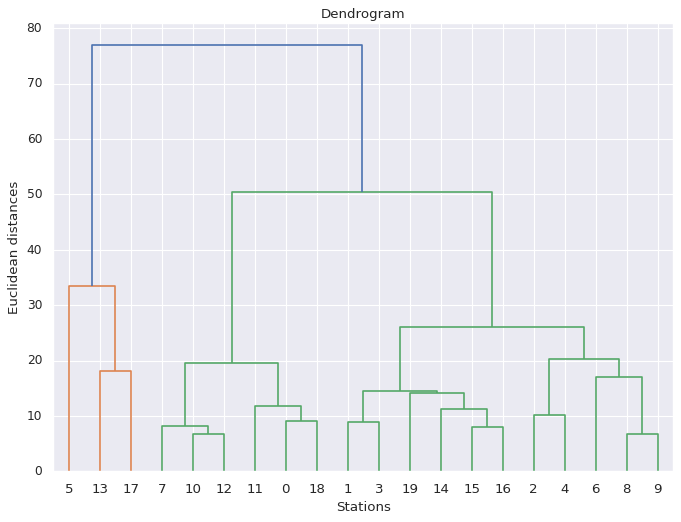

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Erstellung des Dendrogramms
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(features_scaled_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Stations')
plt.ylabel('Euclidean distances')
plt.show()